# *TLC project by Gururaj Athani* 

## **Project Goal**

Develop regression model that helps estimate taxi fares before the ride based on the data TLC has gathered

## **Project Oraganization**

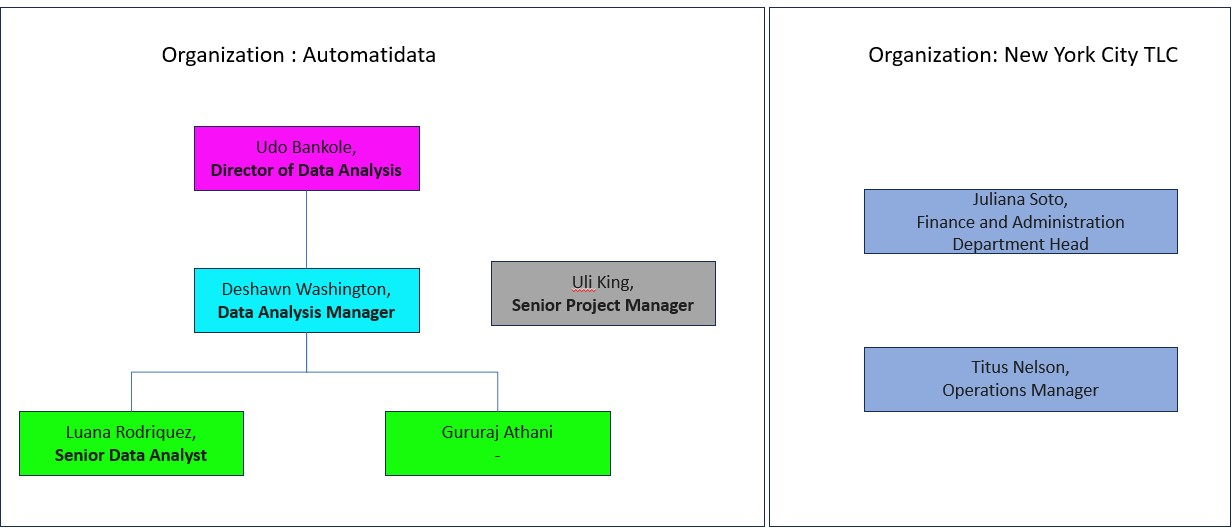

## **High Level Plan**

### **PLAN_Task 1: High Level Planning Document: TLC Project strategy**

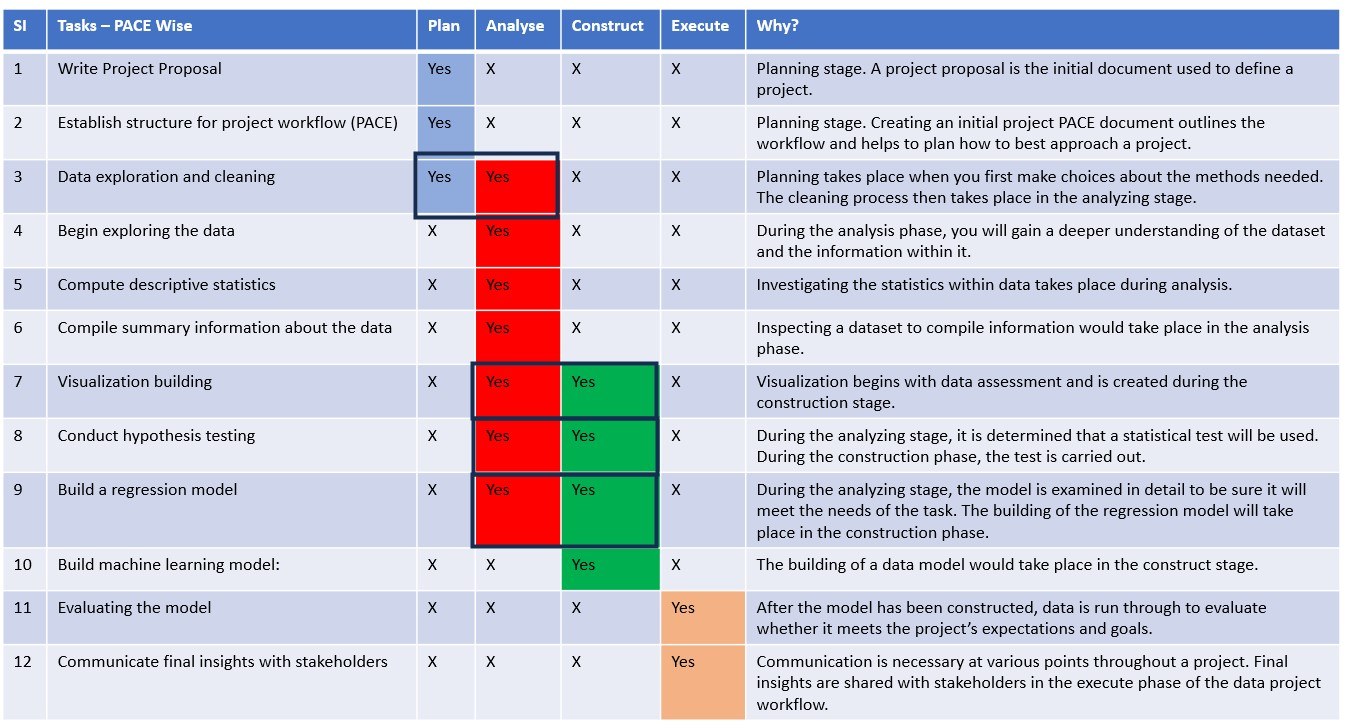

#### **PLAN_Task 2: TLC Projet Proposal**

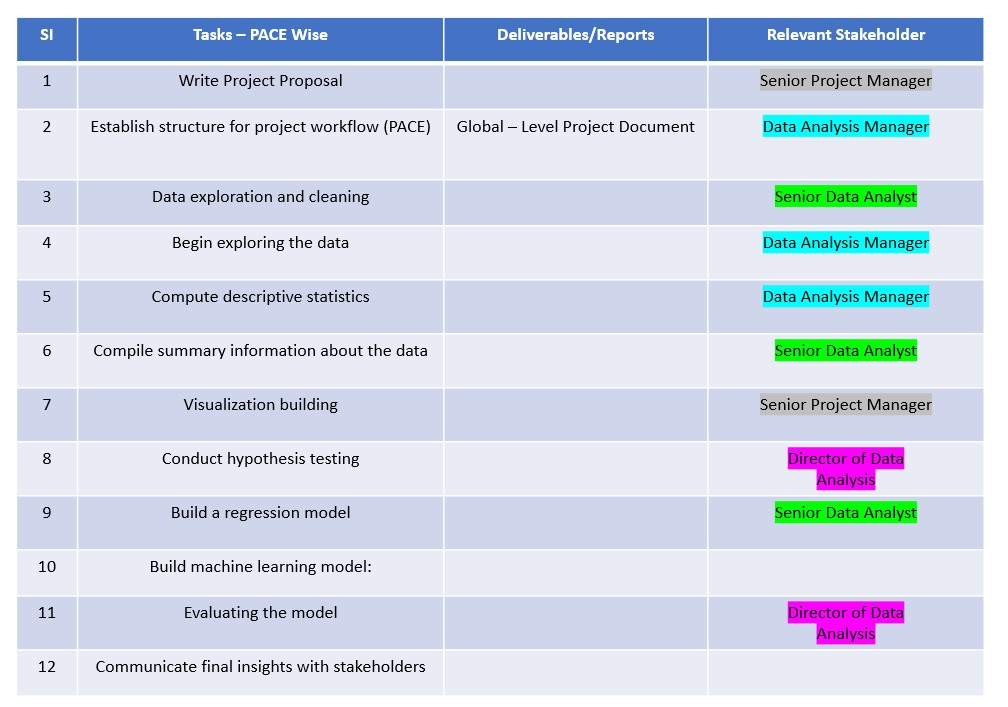

#### **EXECUTE_Task  1: Communicate project introduction to Team and Stakeholders**

Share the Project Organization, Proposal and the starategy to the team.

#### **PLAN_Task     3: Frame the Problem**

New York City - TLC (Taxi Limousine) company would like to use its Old unused data to make a useful solution, i.e. 
  - Make a Performance Dashboards
  - Customer Facing Tools
  - Strategic Business Insights

This could mean: 
1. Create a model that could predict the fare for a ride before it starts
2. Visulazations dashboard
3. other insights which could help business decisions in future.

## **Begin Exploring Data**

#### **PLAN_Task 4: Imports and Data Loading**

In [1]:
#Import libraries and packages listed above
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as OLS
#import datetime

import datetime as dt
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split,GridSearchCV  

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier,plot_importance

import pickle

# Load dataset into dataframe
df = pd.read_csv('data\\2017_Yellow_Taxi_Trip_Data.csv')
print("done")

done


#### **ANALYZE_Task 1: Build Dataframe**

In [2]:
#Display first 10 rows
df.head(10)

Unnamed: 0  VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  \
0    24870114         2   03/25/2017 8:55:43 AM   03/25/2017 9:09:47 AM   
1    35634249         1   04/11/2017 2:53:28 PM   04/11/2017 3:19:58 PM   
2   106203690         1   12/15/2017 7:26:56 AM   12/15/2017 7:34:08 AM   
3    38942136         2   05/07/2017 1:17:59 PM   05/07/2017 1:48:14 PM   
4    30841670         2  04/15/2017 11:32:20 PM  04/15/2017 11:49:03 PM   
5    23345809         2   03/25/2017 8:34:11 PM   03/25/2017 8:42:11 PM   
6    37660487         2   05/03/2017 7:04:09 PM   05/03/2017 8:03:47 PM   
7    69059411         2   08/15/2017 5:41:06 PM   08/15/2017 6:03:05 PM   
8     8433159         2   02/04/2017 4:17:07 PM   02/04/2017 4:29:14 PM   
9    95294817         1   11/10/2017 3:20:29 PM   11/10/2017 3:40:55 PM   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                6           3.34           1                  N   
1                1           1.80           1                  N   
2                1           1.00           1                  N   
3                1           3.70           1                  N   
4                1           4.37           1                  N   
5                6           2.30           1                  N   
6                1          12.83           1                  N   
7                1           2.98           1                  N   
8                1           1.20           1                  N   
9                1           1.60           1                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           100           231             1         13.0    0.0      0.5   
1           186            43             1         16.0    0.0      0.5   
2           262           236             1          6.5    0.0      0.5   
3           188            97             1         20.5    0.0      0.5   
4             4           112             2         16.5    0.5      0.5   
5           161           236             1          9.0    0.5      0.5   
6            79           241             1         47.5    1.0      0.5   
7           237           114             1         16.0    1.0      0.5   
8           234           249             2          9.0    0.0      0.5   
9           239           237             1         13.0    0.0      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  
0        2.76           0.0                    0.3         16.56  
1        4.00           0.0                    0.3         20.80  
2        1.45           0.0                    0.3          8.75  
3        6.39           0.0                    0.3         27.69  
4        0.00           0.0                    0.3         17.80  
5        2.06           0.0                    0.3         12.36  
6        9.86           0.0                    0.3         59.16  
7        1.78           0.0                    0.3         19.58  
8        0.00           0.0                    0.3          9.80  
9        2.75           0.0                    0.3         16.55

#### **ANALYZE_Task 2: Understand the data - Investigate the variables**


- Understand the Data
1. Shape,
2. info()
3. describe()

- Understand variables
1. Identify categorical variables.
2. Identify contenuous variables.


In [3]:
print(df.shape)
print(df.info())
print(df.describe())

(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

Variables
  1. VendorID               Categorical Variable
  2. RatecodeID             Categorical Variable
  3. store_and_fwd_flag     Categorical Variable
  4. PULocationID           Discrete Variable
  5. DOLocationID           Discrete Variable
  6. payment_type           Categorical Variable  
  7. passenger_count        Categorical Variable  
 
  1. tpep_pickup_datetime   Continuous Variable
  2. tpep_dropoff_datetime  Continuous Variable
  3. trip_distance          Continuous Variable
  4. fare_amount            Continuous Variable
  5. extra                  Continuous Variable
  6. mta_tax                Continuous Variable
  7. tip_amount             Continuous Variable
  8. tolls_amount           Continuous Variable
  9. improvement_surcharge  Continuous Variable
  10. total_amount           Continuous Variable

#### **EXECUTE_Task 1: Understand the Data**

Recomendataions for data after initial analyis
1) Datatype update:
- tpep_pickup_datetime : convert to datetime variable
- tpep_dropoff_datetime : convert to datetime variable
    
    
2) Add a new variable , 
- Ride duration by subtarcting the tpep_pickup_datetime from tpep_dropoff_datetime

### ***PLAN_Task 5: Data Exploration and Cleaning***

Cleaning
- Use dropna() to remove the rows with empty cells

Uderstand the data by plotting.
- Box Plot  - Find the outliers
- Histogram - Understand the distribution
- Bar Plot  - For Time Series analysis - Montly, Daily , Hourly

### ***ANALYZE_Task 3: Data Exploration and Cleaning***

## **Data Exploration and Cleaning**

### ***Data Discovering*** 

In [4]:
print(df.describe(include = 'all',datetime_is_numeric=True)),
df.info()

          Unnamed: 0      VendorID   tpep_pickup_datetime  \
count   2.269900e+04  22699.000000                  22699   
unique           NaN           NaN                  22687   
top              NaN           NaN  07/03/2017 3:45:19 PM   
freq             NaN           NaN                      2   
mean    5.675849e+07      1.556236                    NaN   
std     3.274493e+07      0.496838                    NaN   
min     1.212700e+04      1.000000                    NaN   
25%     2.852056e+07      1.000000                    NaN   
50%     5.673150e+07      2.000000                    NaN   
75%     8.537452e+07      2.000000                    NaN   
max     1.134863e+08      2.000000                    NaN   

        tpep_dropoff_datetime  passenger_count  trip_distance    RatecodeID  \
count                   22699     22699.000000   22699.000000  22699.000000   
unique                  22688              NaN            NaN           NaN   
top     10/18/2017 8:07:45 PM 

### ***Structuring***

#### ***DataType Conversion***

In [5]:
# Convert data columns to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])
df.dtypes


Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

#### ***Create New Columns*** 

In [6]:
#Create new columns for Time series analysis
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
df['day'] = df['tpep_pickup_datetime'].dt.day_name()
df['hour'] = df['tpep_pickup_datetime'].dt.hour

#Find the Ride Duration
df['ride_duration'] =df['tpep_dropoff_datetime']- df['tpep_pickup_datetime']
df['ride_duration'].dt.seconds
timediff = df['ride_duration'].dt.days + df['ride_duration'].dt.seconds 
timediff=timediff/60

### ***Data Cleaning***

#### ***Missing Values*** 

In [7]:
print('Before Cleaning : ',df.shape)
df.dropna(inplace=True)
#drop any na's
df.isna().sum()

print('After Cleaning  : ',df.shape)

Before Cleaning :  (22699, 22)
After Cleaning  :  (22699, 22)


#### ***Missing spelling*** 

#### ***Duplicates*** 

In [8]:
#drop any duplicates
df.drop_duplicates()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0        24870114         2  2017-03-25 08:55:43   2017-03-25 09:09:47   
1        35634249         1  2017-04-11 14:53:28   2017-04-11 15:19:58   
2       106203690         1  2017-12-15 07:26:56   2017-12-15 07:34:08   
3        38942136         2  2017-05-07 13:17:59   2017-05-07 13:48:14   
4        30841670         2  2017-04-15 23:32:20   2017-04-15 23:49:03   
...           ...       ...                  ...                   ...   
22694    14873857         2  2017-02-24 17:37:23   2017-02-24 17:40:39   
22695    66632549         2  2017-08-06 16:43:59   2017-08-06 17:24:47   
22696    74239933         2  2017-09-04 14:54:14   2017-09-04 14:58:22   
22697    60217333         2  2017-07-15 12:56:30   2017-07-15 13:08:26   
22698    17208911         1  2017-03-02 13:02:49   2017-03-02 13:16:09   

       passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                    6           3.34           1                  N   
1                    1           1.80           1                  N   
2                    1           1.00           1                  N   
3                    1           3.70           1                  N   
4                    1           4.37           1                  N   
...                ...            ...         ...                ...   
22694                3           0.61           1                  N   
22695                1          16.71           2                  N   
22696                1           0.42           1                  N   
22697                1           2.36           1                  N   
22698                1           2.10           1                  N   

       PULocationID  DOLocationID  ...  extra  mta_tax  tip_amount  \
0               100           231  ...    0.0      0.5        2.76   
1               186            43  ...    0.0      0.5        4.00   
2               262           236  ...    0.0      0.5        1.45   
3               188            97  ...    0.0      0.5        6.39   
4                 4           112  ...    0.5      0.5        0.00   
...             ...           ...  ...    ...      ...         ...   
22694            48           186  ...    1.0      0.5        0.00   
22695           132           164  ...    0.0      0.5       14.64   
22696           107           234  ...    0.0      0.5        0.00   
22697            68           144  ...    0.0      0.5        1.70   
22698           239           236  ...    0.0      0.5        2.35   

       tolls_amount  improvement_surcharge  total_amount      month       day  \
0              0.00                    0.3         16.56      March  Saturday   
1              0.00                    0.3         20.80      April   Tuesday   
2              0.00                    0.3          8.75   December    Friday   
3              0.00                    0.3         27.69        May    Sunday   
4              0.00                    0.3         17.80      April  Saturday   
...             ...                    ...           ...        ...       ...   
22694          0.00                    0.3          5.80   February    Friday   
22695          5.76                    0.3         73.20     August    Sunday   
22696          0.00                    0.3          5.30  September    Monday   
22697          0.00                    0.3         13.00       July  Saturday   
22698          0.00                    0.3         14.15      March  Thursday   

      hour   ride_duration  
0        8 0 days 00:14:04  
1       14 0 days 00:26:30  
2        7 0 days 00:07:12  
3       13 0 days 00:30:15  
4       23 0 days 00:16:43  
...    ...             ...  
22694   17 0 days 00:03:16  
22695   16 0 days 00:40:48  
22696   14 0 days 00:04:08  
22697   12 0 days 00:11:56  
22698   13 0 days 00:13:20  

[22699 rows x 22 columns]

#### ***Extreme outliers***  

##### ***Box Plots***

Text(0.5, 1.0, 'Tip Amount')

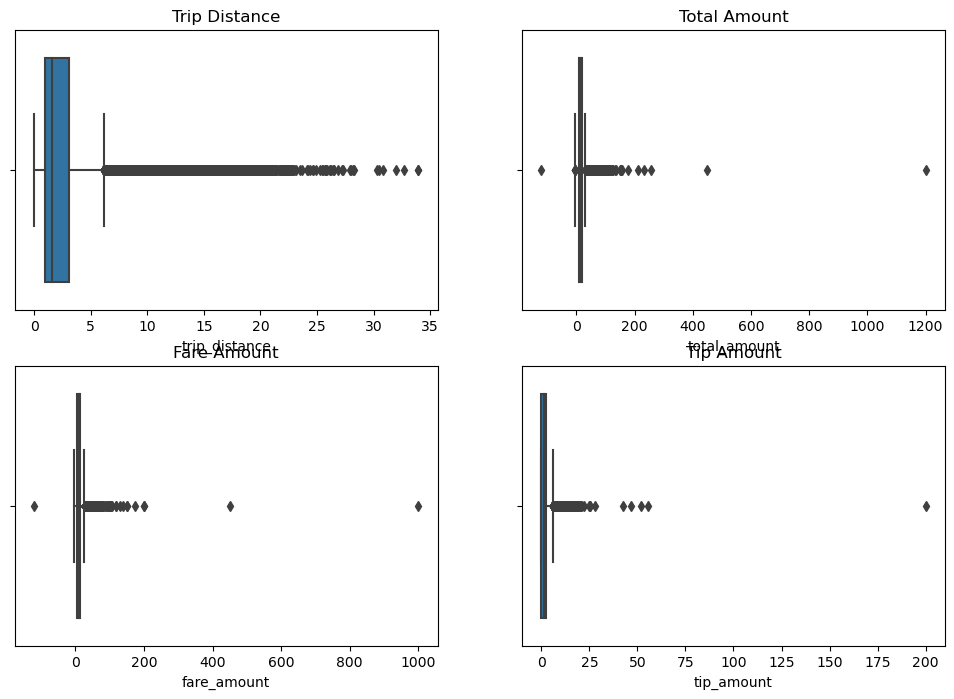

In [9]:
#Box Plots for some variables
fig, axes = plt.subplots(2, 2, figsize = (12,8))

sns.boxplot(ax=axes[0,0],x=df['trip_distance'])
axes[0,0].set_title('Trip Distance')

sns.boxplot(ax=axes[0,1],x=df['total_amount'])
axes[0,1].set_title('Total Amount')

sns.boxplot(ax=axes[1,0],x=df['fare_amount'])
axes[1,0].set_title('Fare Amount')

sns.boxplot(ax=axes[1,1],x=df['tip_amount'])
axes[1,1].set_title('Tip Amount')

##### ***Outliers***

In [10]:
# Are trip distances of 0 bad data or very short trips rounded down?
df['trip_distance'].sort_values()

trip_dist_0 = df[(df['trip_distance']==0)]['trip_distance']
print('Trip distance =0 count! \n',trip_dist_0.value_counts())


fare_amt_0orLess =df[(df['fare_amount']<=0)]['fare_amount']
print('Fare amount 0 or less than 0!\n',fare_amt_0orLess.value_counts())
#print(fare_amt_0orLess.count())

Trip distance =0 count! 
 0.0    148
Name: trip_distance, dtype: int64
Fare amount 0 or less than 0!
  0.0      6
-2.5      4
-3.5      3
-3.0      2
-4.5      2
-4.0      2
-120.0    1
Name: fare_amount, dtype: int64


##### ***Imputations***

###### ***Impute Functions***

In [11]:

def Impute_upper_limit(column_list,iqr_factor,Q1_Value,Q3_value) :
    iqr_value = Q3_value-Q1_Value
    print("iqr_value = ",iqr_value)
    upper_limit = iqr_factor*iqr_value + Q3_value
    print("upper_limit = ",upper_limit)
    for i in range(len(column_list) ):
        #print(column_list)
        if (column_list[i] > upper_limit) :
            column_list[i] = upper_limit     
         
   # column_list = column_list.mask(column_list>upper_limit,upper_limit)
   # print("column_list = ",column_list)
    return(column_list)

def Impute_lower_limit(column_list,iqr_factor,Q1_Value,Q3_value) :
    iqr_value = Q3_value-Q1_Value
    print("iqr_value = ",iqr_value)
    lower_limit = Q1_Value-iqr_factor*iqr_value 
    print("lower_limit = ",lower_limit)
    for i in range(len(column_list) ):
        #print(column_list)
        if (column_list[i] < lower_limit) :
            column_list[i] = lower_limit     
         
   # column_list = column_list.mask(column_list>upper_limit,upper_limit)
   # print("column_list = ",column_list)
    return(column_list)

def Impute_lower_limit_to_threshold(column_list,threshold_value) :

    for i in range(len(column_list) ):
        #print(column_list)
        if (column_list[i] < threshold_value) :
            column_list[i] = threshold_value     
         
   # column_list = column_list.mask(column_list>upper_limit,upper_limit)
   # print("column_list = ",column_list)
    return(column_list)


###### ***Impute***

In [12]:
df['fare_amount']=Impute_upper_limit(df['fare_amount'],6,6.5,14.5)
df['fare_amount']=Impute_lower_limit_to_threshold(df['fare_amount'],0)

iqr_value =  8.0
upper_limit =  62.5


C:\Users\gurur\AppData\Local\Temp\ipykernel_23344\449950090.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_list[i] = upper_limit
C:\Users\gurur\AppData\Local\Temp\ipykernel_23344\449950090.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_list[i] = threshold_value


In [13]:
df['ride_duration'] = pd.to_timedelta(df['ride_duration'])

# Impute a 0 for any negative values
threshold_duration=pd.to_timedelta(0)
#df1['duration'] = Impute_lower_timedeldat_limit_to_threshold(df1['duration'],threshold_duration) 
df['ride_duration'] = Impute_lower_limit_to_threshold(df['ride_duration'],threshold_duration) 

# Impute the high outliers
threshold_duration=pd.to_timedelta(0)
q1 = pd.to_timedelta('0 days 00:06:39')
q3 = pd.to_timedelta('0 days 00:18:23')
factor=6

df['ride_duration']=Impute_upper_limit(df['ride_duration'],6,q1,q3) 
df.describe()

C:\Users\gurur\AppData\Local\Temp\ipykernel_23344\449950090.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_list[i] = threshold_value
C:\Users\gurur\AppData\Local\Temp\ipykernel_23344\449950090.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_list[i] = upper_limit


iqr_value =  0 days 00:11:44
upper_limit =  0 days 01:28:47


Unnamed: 0      VendorID  passenger_count  trip_distance  \
count  2.269900e+04  22699.000000     22699.000000   22699.000000   
mean   5.675849e+07      1.556236         1.642319       2.913313   
std    3.274493e+07      0.496838         1.285231       3.653171   
min    1.212700e+04      1.000000         0.000000       0.000000   
25%    2.852056e+07      1.000000         1.000000       0.990000   
50%    5.673150e+07      2.000000         1.000000       1.610000   
75%    8.537452e+07      2.000000         2.000000       3.060000   
max    1.134863e+08      2.000000         6.000000      33.960000   

         RatecodeID  PULocationID  DOLocationID  payment_type   fare_amount  \
count  22699.000000  22699.000000  22699.000000  22699.000000  22699.000000   
mean       1.043394    162.412353    161.527997      1.336887     12.897913   
std        0.708391     66.633373     70.139691      0.496211     10.541137   
min        1.000000      1.000000      1.000000      1.000000      0.000000   
25%        1.000000    114.000000    112.000000      1.000000      6.500000   
50%        1.000000    162.000000    162.000000      1.000000      9.500000   
75%        1.000000    233.000000    233.000000      2.000000     14.500000   
max       99.000000    265.000000    265.000000      4.000000     62.500000   

              extra       mta_tax    tip_amount  tolls_amount  \
count  22699.000000  22699.000000  22699.000000  22699.000000   
mean       0.333275      0.497445      1.835781      0.312542   
std        0.463097      0.039465      2.800626      1.399212   
min       -1.000000     -0.500000      0.000000      0.000000   
25%        0.000000      0.500000      0.000000      0.000000   
50%        0.000000      0.500000      1.350000      0.000000   
75%        0.500000      0.500000      2.450000      0.000000   
max        4.500000      0.500000    200.000000     19.100000   

       improvement_surcharge  total_amount          hour  \
count           22699.000000  22699.000000  22699.000000   
mean                0.299551     16.310502     13.726552   
std                 0.015673     16.097295      6.224675   
min                -0.300000   -120.300000      0.000000   
25%                 0.300000      8.750000      9.000000   
50%                 0.300000     11.800000     14.000000   
75%                 0.300000     17.800000     19.000000   
max                 0.300000   1200.290000     23.000000   

                   ride_duration  
count                      22699  
mean   0 days 00:14:27.633287810  
std    0 days 00:11:56.822559119  
min              0 days 00:00:00  
25%              0 days 00:06:39  
50%              0 days 00:11:11  
75%              0 days 00:18:23  
max              0 days 01:28:47

## **Compute Discriptive Statistics**

##### Descriptive Statistics
- Understand Measure of central tendency.
    - Mean
    - Median
    - Mode
- Understand Measure of dispersion
    - Range
    - Variance 
    - Standard Deviation
    
    
- Mean for continuous variables

##### Inferential Statistics
- Create sample data , Indentify the Sample Size

- Calculate Standard error
    - Standard Error (mean) = Standard Deviation / sqrt(n -> number of data points in the sample)
    - Standrd Error (proportion) = sqrt((SamplePropertion)*(1-SamplePropertion) / n)
    
- Calculate Margin of Error
    - Margin of error = Z-Score * Standard Error
        - Confidence Level :  Z-Score
          -   90%          :     1.645
          -   95%          :     1.96
          -   99%          :     2.58

- Confidence level and confidence interval for the means
    -Confidence Level = 95%
     1) For Means:
        -  Upper Limit = Sample means + margin of error
        -  Lower Limit = Sample means - margin of error
    
     2) For Proportions:
        -  Upper Limit = Sample proportions + margin of error
        -  Lower Limit = Sample proportions - margin of error    

In [14]:
print(df.describe(include='all'))

confidence_level=0.95 #95%
Z_Score = 1.96

#sampled_data = df.sample(n=200, replace=True, random_state=31208)
sampled_data=df
estimated_standard_error = sampled_data['trip_distance'].std() / np.sqrt(sampled_data.shape[0])
sampled_mean=sampled_data['trip_distance'].mean()
confidence_interval = stats.norm.interval(confidence=confidence_level,loc=sampled_mean,scale=estimated_standard_error)

print('Sampled Mean             [trip_distance]       =', sampled_mean)
print('Estimated standard_error [trip_distance]       =',estimated_standard_error)
print("Margin of error          [trip_distance]       =",estimated_standard_error*Z_Score) 
print("Confidence Interval      [trip_distance] Mean  :",confidence_interval)

print("\n")


estimated_standard_error = sampled_data['total_amount'].std() / np.sqrt(sampled_data.shape[0])
sampled_mean=sampled_data['total_amount'].mean()
confidence_interval = stats.norm.interval(confidence=confidence_level,loc=sampled_mean,scale=estimated_standard_error)

print('Sampled Mean              [total_amount]       =', sampled_mean)
print('estimated_standard_error  [total_amount]       =',estimated_standard_error)
print("Margin of error           [total_amount]       =",estimated_standard_error*Z_Score) 
print("Confidence Interval       [total_amount] Mean  :", confidence_interval)

print("\n")
estimated_standard_error = sampled_data['fare_amount'].std() / np.sqrt(sampled_data.shape[0])
sampled_mean=sampled_data['fare_amount'].mean()
confidence_interval = stats.norm.interval(confidence=confidence_level,loc=sampled_mean,scale=estimated_standard_error)

print('Sampled Mean              [fare_amount]       =', sampled_mean)
print('estimated_standard_error  [fare_amount]       =',estimated_standard_error)
print("Margin of error           [fare_amount]       =",estimated_standard_error*Z_Score) 
print("Confidence Interval       [fare_amount] Mean  :", confidence_interval)

print("\n")
estimated_standard_error = sampled_data['tip_amount'].std() / np.sqrt(sampled_data.shape[0])
sampled_mean=sampled_data['tip_amount'].mean()
confidence_interval = stats.norm.interval(confidence=confidence_level,loc=sampled_mean,scale=estimated_standard_error)

print('Sampled Mean              [tip_amount]       =', sampled_mean)
print('estimated_standard_error  [tip_amount]       =',estimated_standard_error)
print("Margin of error           [tip_amount]       =",estimated_standard_error*Z_Score) 
print("Confidence Interval       [tip_amount] Mean  :", confidence_interval)


          Unnamed: 0      VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
count   2.269900e+04  22699.000000                22699                 22699   
unique           NaN           NaN                22687                 22688   
top              NaN           NaN  2017-07-03 15:45:19   2017-10-18 20:07:45   
freq             NaN           NaN                    2                     2   
first            NaN           NaN  2017-01-01 00:08:25   2017-01-01 00:17:20   
last             NaN           NaN  2017-12-31 23:45:30   2017-12-31 23:49:24   
mean    5.675849e+07      1.556236                  NaN                   NaN   
std     3.274493e+07      0.496838                  NaN                   NaN   
min     1.212700e+04      1.000000                  NaN                   NaN   
25%     2.852056e+07      1.000000                  NaN                   NaN   
50%     5.673150e+07      2.000000                  NaN                   NaN   
75%     8.537452e+07      2.

C:\Users\gurur\AppData\Local\Temp\ipykernel_23344\1729405209.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe(include='all'))
C:\Users\gurur\AppData\Local\Temp\ipykernel_23344\1729405209.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe(include='all'))


## **Compile Summary information about the data**

### ***Continuous variable analysis***

Data Exploration by visualization

<Axes: xlabel='tip_amount', ylabel='Count'>

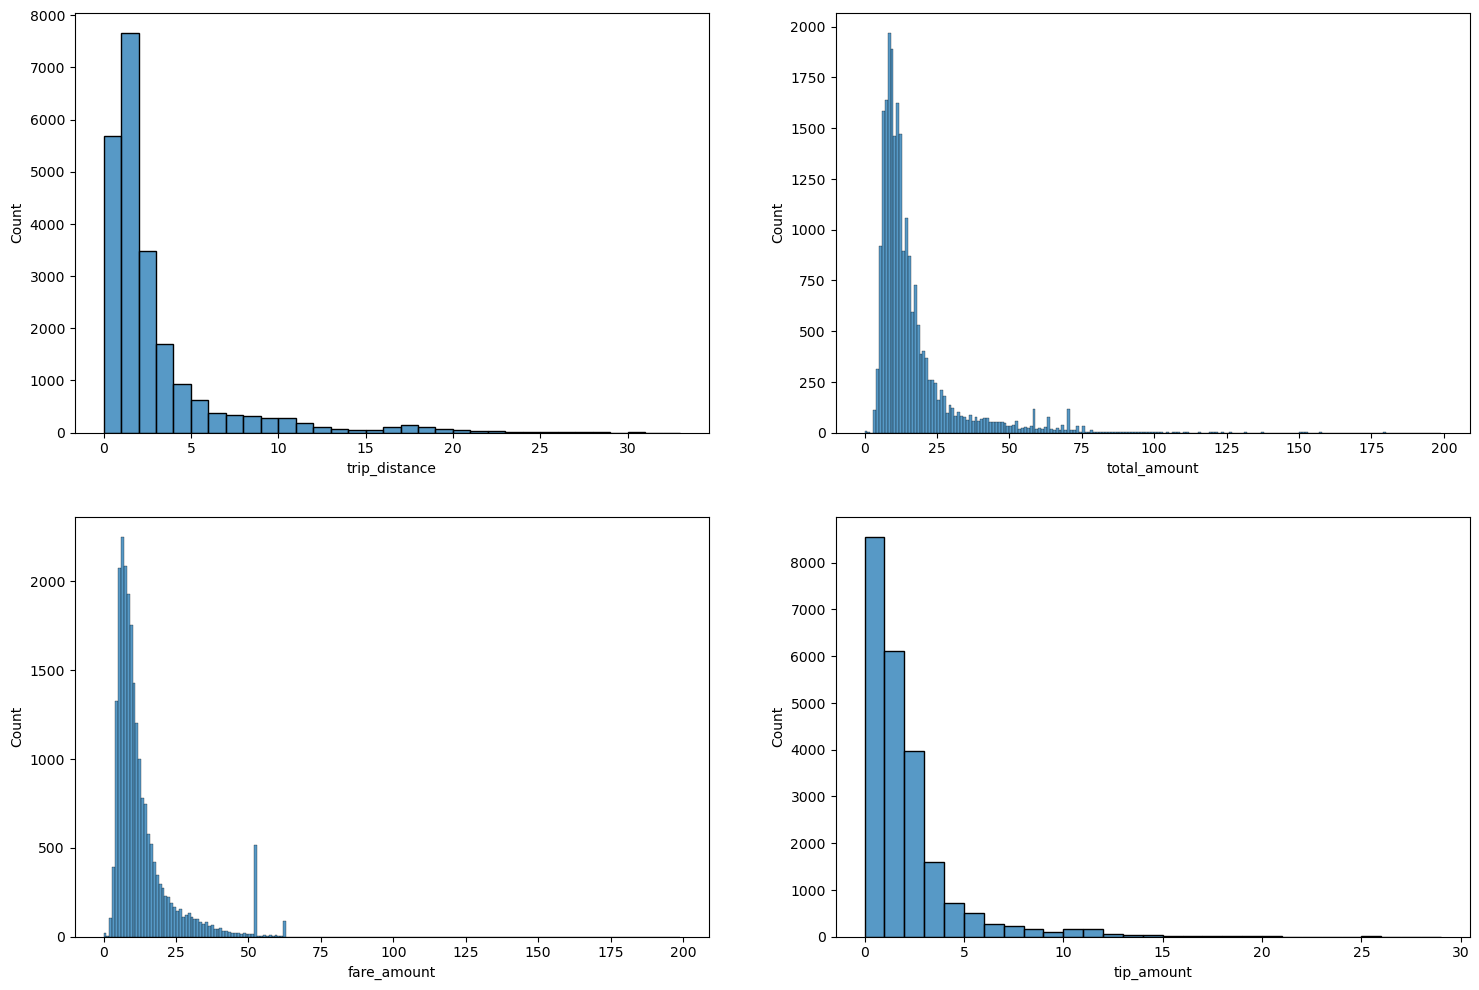

In [15]:
#Box Plots for some variables
fig, axes = plt.subplots(2, 2, figsize = (18,12))

#Distribution for some variables
sns.histplot(ax=axes[0,0],x=df['trip_distance'],bins=range(0,34,1))
#axes[1,0].set_title('Trip Distance distribution')

sns.histplot(ax=axes[0,1],x=df['total_amount'],bins=range(0,200,1))
#axes[1,1].set_title('Total Amount distribution')

sns.histplot(ax=axes[1,0],x=df['fare_amount'],bins=range(0,200,1))
#axes[1,2].set_title('Fare Amount distribution')

sns.histplot(ax=axes[1,1],x=df['tip_amount'],bins=range(0,30,1))
#axes[1,3].set_title('Tip Amount distribution')


### ***Categorical and Continuous variable analysis***

<Axes: xlabel='tip_amount', ylabel='Count'>

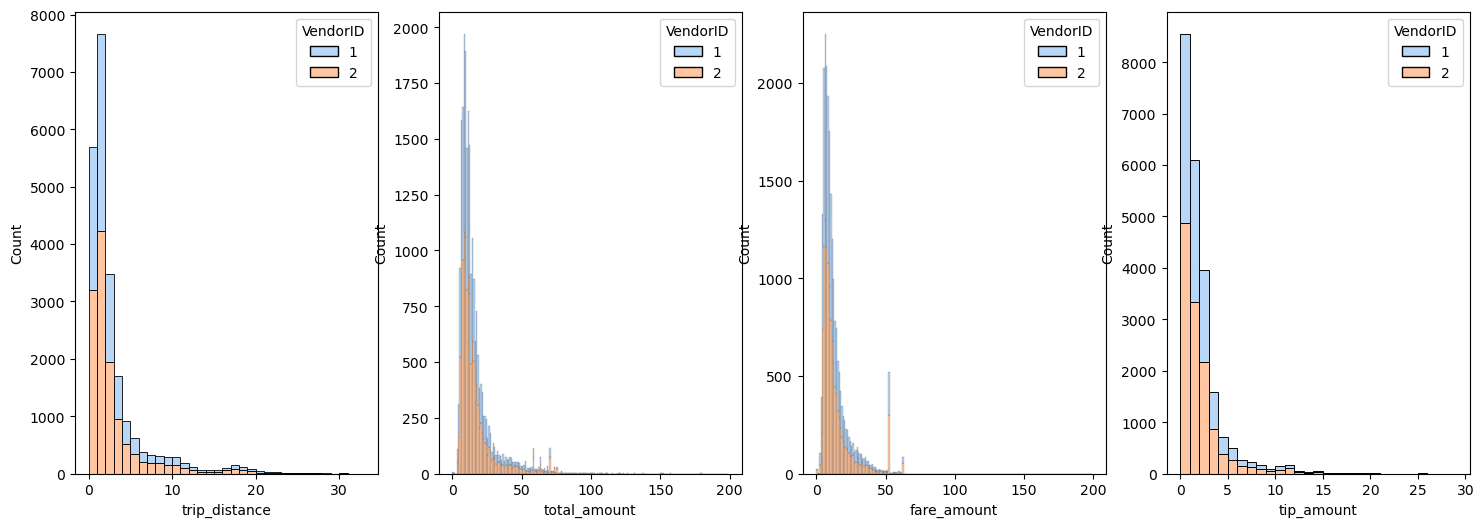

In [16]:
#Box Plots for some variables
fig, axes = plt.subplots(1, 4, figsize = (18,6))

sns.histplot(ax=axes[0],x=df['trip_distance'], bins=range(0,34,1),hue=df['VendorID'],multiple='stack',palette='pastel');
#axes[2,0].set_title('Trip Distance by vendor histogram');

sns.histplot(ax=axes[1],x=df['total_amount'], bins=range(0,200,1),hue=df['VendorID'],multiple='stack',palette='pastel')
#axes[2,1].set_title('Total Amount by vendor histogram')

sns.histplot(ax=axes[2],x=df['fare_amount'], bins=range(0,200,1),hue=df['VendorID'],multiple='stack',palette='pastel')
#axes[2,2].set_title('Fare Amount by vendor histogram')

sns.histplot(ax=axes[3],x=df['tip_amount'], bins=range(0,30,1),hue=df['VendorID'],multiple='stack',palette='pastel')
#axes[2,3].set_title('Tip Amount by vendor histogram')

### ***Time Series analysis***

Text(0.5, 1.0, 'Hourly Revenue')

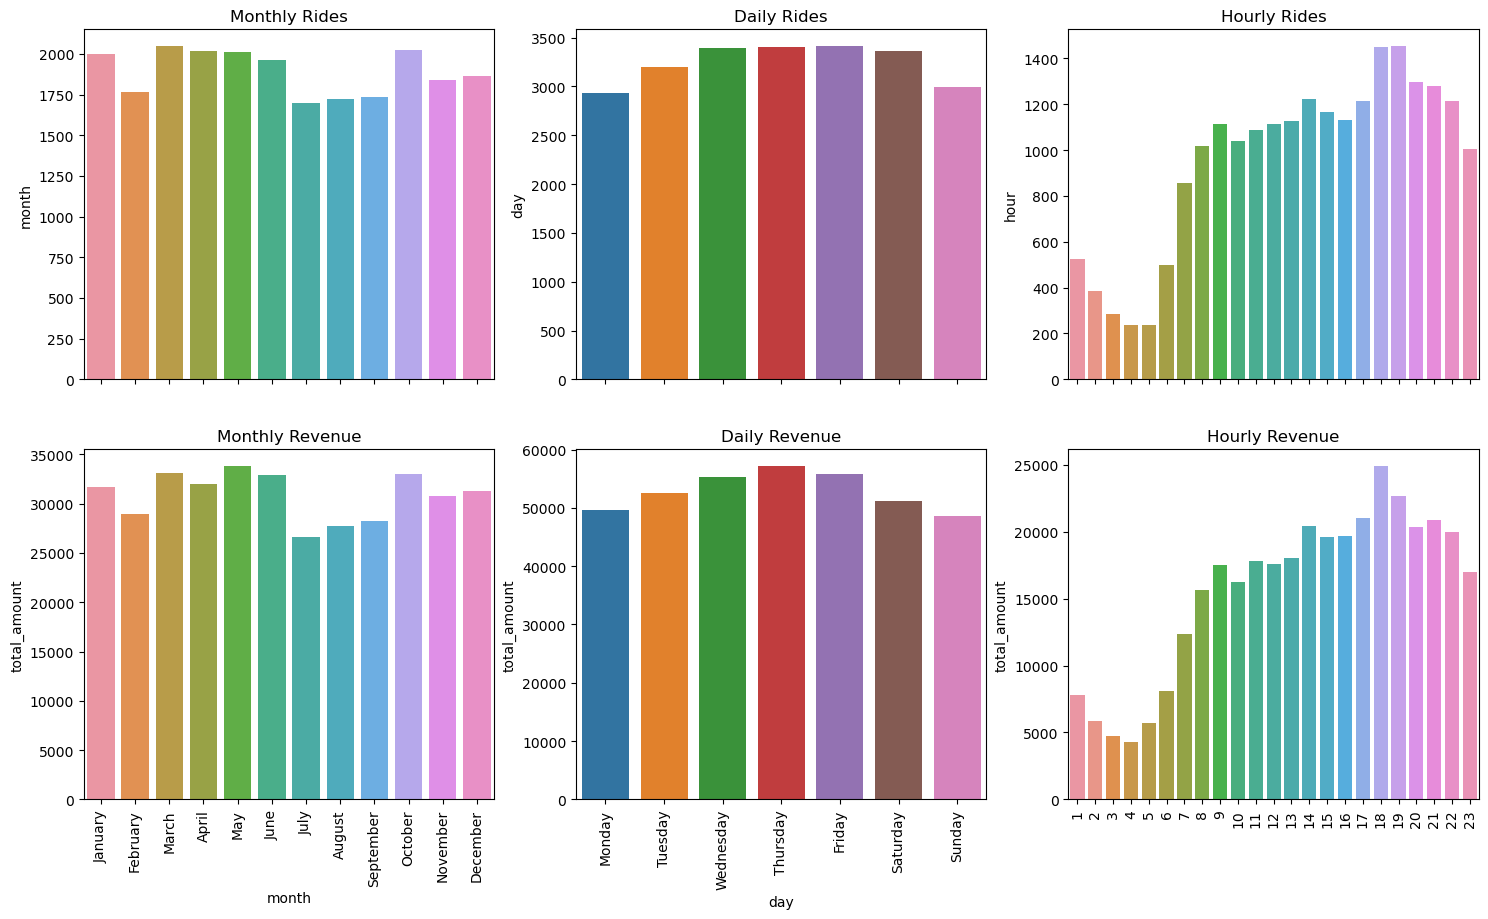

In [17]:
#****************Time Series Analysis********************************

#Box Plots for some variables
fig, axes1 = plt.subplots(2,3, figsize = (18,10))

#define the Time Series orders, Months, Days and Hours
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

hours = range(1,24)
hour_order=pd.Series(list(hours))

#Number of Rides per day and per month
#1. Monthly Rides
monthly_rides = df['month'].value_counts()
monthly_rides = monthly_rides.reindex(index=month_order)
sns.barplot(ax=axes1[0,0],x=monthly_rides.index,y=monthly_rides) 
#axes1[0,0].set_xticklabels(month_order,rotation=90)
axes1[0,0].set_xticklabels("")
axes1[0,0].set_title('Monthly Rides')


#2. Daily Rides
daily_rides = df['day'].value_counts()
daily_rides = daily_rides.reindex(index=day_order)
sns.barplot(ax=axes1[0,1],x=daily_rides.index,y=daily_rides) 
#axes1[0,1].set_xticklabels(daily_rides,rotation=90)
axes1[0,1].set_xticklabels("")
axes1[0,1].set_title('Daily Rides')

#3. Hourly Rides
hourly_rides = df['hour'].value_counts()
hourly_rides = hourly_rides.reindex(index=hour_order)
sns.barplot(ax=axes1[0,2],x=hourly_rides.index,y=hourly_rides) 
#axes1[0,2].set_xticklabels(hour_order,rotation=90);
axes1[0,2].set_xticklabels("");
axes1[0,2].set_title('Hourly Rides')


#4. Monthly Revenue
monthly_revenue = df.groupby('month').sum(numeric_only=True)[['total_amount']]
monthly_revenue = monthly_revenue.reindex(index=month_order)
sns.barplot(ax=axes1[1,0],x=monthly_revenue.index, y=monthly_revenue['total_amount']) 
axes1[1,0].set_xticklabels(month_order,rotation=90)
axes1[1,0].set_title('Monthly Revenue')

#5. Daily Revenue
daily_revenue = df.groupby('day').sum(numeric_only=True)[['total_amount']]
daily_revenue = daily_revenue.reindex(index=day_order)
sns.barplot(ax=axes1[1,1],x=daily_revenue.index, y=daily_revenue['total_amount']) 
axes1[1,1].set_xticklabels(day_order,rotation=90)
axes1[1,1].set_title('Daily Revenue')

#6. Hourly Revenue
hourly_revenue = df.groupby('hour').sum(numeric_only=True)[['total_amount']]
hourly_revenue = hourly_revenue.reindex(index=hour_order)
sns.barplot(ax=axes1[1,2],x=hourly_revenue.index, y=hourly_revenue['total_amount']) 
axes1[1,2].set_xticklabels(hour_order,rotation=90)
axes1[1,2].set_title('Hourly Revenue')



#monthly_rides = monthly_rides.reindex(index=month_order)
#sns.barplot(ax=axes1[0],x=monthly_rides.index,y=monthly_rides) 
#axes1[0].set_xticklabels(month_order,rotation=90)
#axes1[0].set_title('Monthly Rides')




### ***Discrete variable analysis***

In [18]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

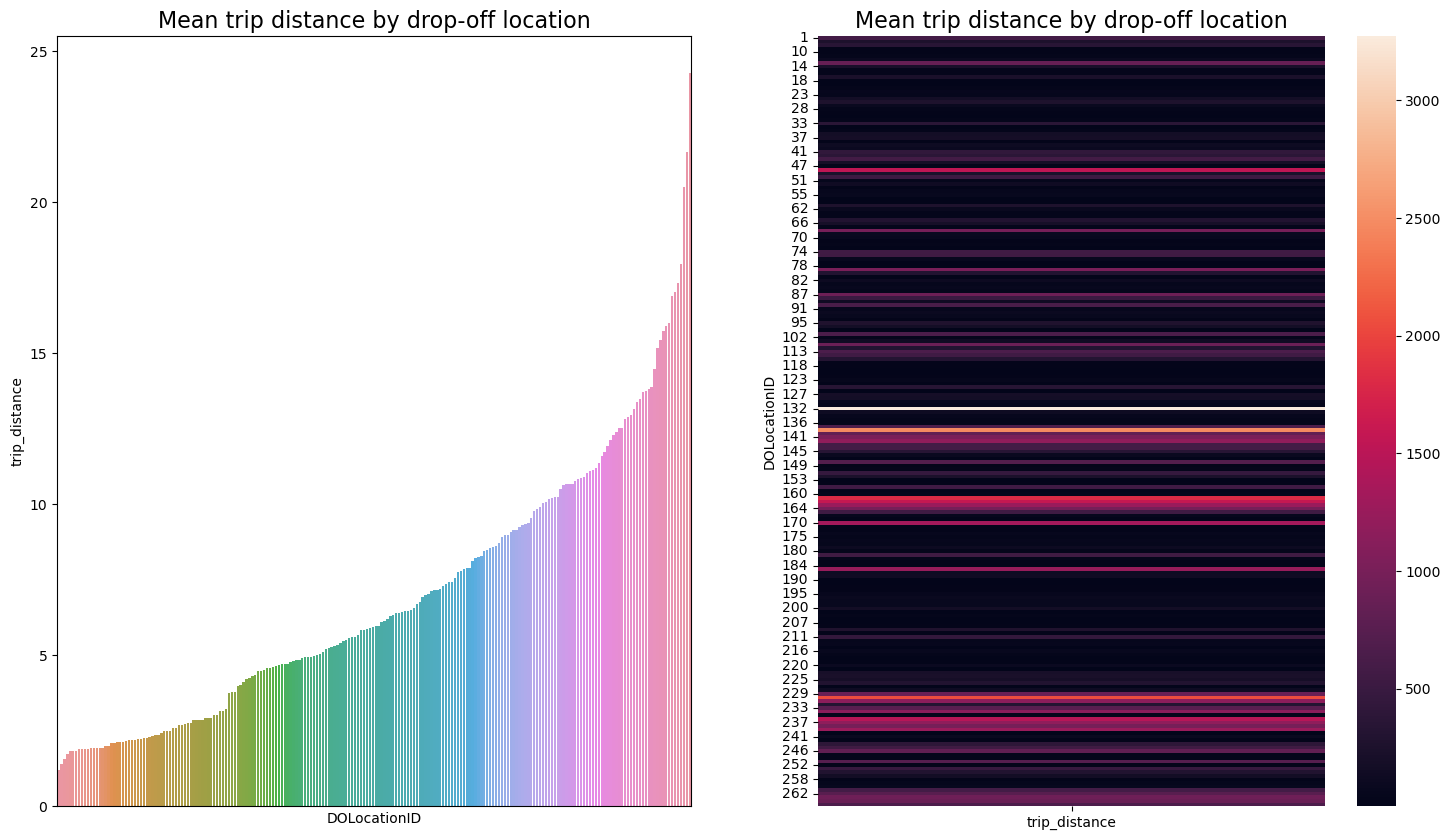

<Figure size 1400x600 with 0 Axes>

In [19]:
#Box Plots for some variables
fig, axes2 = plt.subplots(1,2, figsize = (18,10))


# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID').mean(numeric_only=True)[['trip_distance']]

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14,6))
sns.barplot(ax=axes2[0],x=distance_by_dropoff.index, 
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index)
axes2[0].set_xticklabels([])
axes2[0].set_xticks([])
axes2[0].set_title('Mean trip distance by drop-off location', fontsize=16);


sumDistance_by_dropoff = df.groupby('DOLocationID').sum(numeric_only=True)[['trip_distance']]
#sumDistance_by_dropoff = sumDistance_by_dropoff.sort_values(by='trip_distance')
sns.heatmap(sumDistance_by_dropoff,ax=axes2[1])
axes2[1].set_title('Mean trip distance by drop-off location', fontsize=16);

## **Visualization Building**

### Tableau for VLC Project

https://public.tableau.com/views/TLC_Project/Sheet2?:language=en-US&:display_count=n&:origin=viz_share_link

## **Conduct Hypothesis Testing**

### **ANALYZE_Task 8: Statistical Tests**

#### Descriptive Statistics
- Understand Measure of central tendency.
    - Mean
    - Median
    - Mode
- Understand Measure of dispersion
    - Range
    - Variance 
    - Standard Deviation
    
    
- Mean for continuous variables

#### Inferential Statistics
- Create sample data , Indentify the Sample Size

- Calculate Standard error
    - Standard Error (mean) = Standard Deviation / sqrt(n -> number of data points in the sample)
    - Standrd Error (proportion) = sqrt((SamplePropertion)*(1-SamplePropertion) / n)
    
- Calculate Margin of Error
    - Margin of error = Z-Score * Standard Error
        - Confidence Level :  Z-Score
          -   90%          :     1.645
          -   95%          :     1.96
          -   99%          :     2.58

- Confidence level and confidence interval for the means
    -Confidence Level = 95%
     1) For Means:
        -  Upper Limit = Sample means + margin of error
        -  Lower Limit = Sample means - margin of error
    
     2) For Proportions:
        -  Upper Limit = Sample proportions + margin of error
        -  Lower Limit = Sample proportions - margin of error    

In [20]:
confidence_level=0.95 #95%
Z_Score = 1.96

#sampled_data = df.sample(n=200, replace=True, random_state=31208)
sampled_data=df
estimated_standard_error = sampled_data['trip_distance'].std() / np.sqrt(sampled_data.shape[0])
sampled_mean=sampled_data['trip_distance'].mean()
confidence_interval = stats.norm.interval(confidence=confidence_level,loc=sampled_mean,scale=estimated_standard_error)

print('Sampled Mean             [trip_distance]       =', sampled_mean)
print('Estimated standard_error [trip_distance]       =',estimated_standard_error)
print("Margin of error          [trip_distance]       =",estimated_standard_error*Z_Score) 
print("Confidence Interval      [trip_distance] Mean  :",confidence_interval)

print("\n")


estimated_standard_error = sampled_data['total_amount'].std() / np.sqrt(sampled_data.shape[0])
sampled_mean=sampled_data['total_amount'].mean()
confidence_interval = stats.norm.interval(confidence=confidence_level,loc=sampled_mean,scale=estimated_standard_error)

print('Sampled Mean              [total_amount]       =', sampled_mean)
print('estimated_standard_error  [total_amount]       =',estimated_standard_error)
print("Margin of error           [total_amount]       =",estimated_standard_error*Z_Score) 
print("Confidence Interval       [total_amount] Mean  :", confidence_interval)

print("\n")
estimated_standard_error = sampled_data['fare_amount'].std() / np.sqrt(sampled_data.shape[0])
sampled_mean=sampled_data['fare_amount'].mean()
confidence_interval = stats.norm.interval(confidence=confidence_level,loc=sampled_mean,scale=estimated_standard_error)

print('Sampled Mean              [fare_amount]       =', sampled_mean)
print('estimated_standard_error  [fare_amount]       =',estimated_standard_error)
print("Margin of error           [fare_amount]       =",estimated_standard_error*Z_Score) 
print("Confidence Interval       [fare_amount] Mean  :", confidence_interval)

print("\n")
estimated_standard_error = sampled_data['tip_amount'].std() / np.sqrt(sampled_data.shape[0])
sampled_mean=sampled_data['tip_amount'].mean()
confidence_interval = stats.norm.interval(confidence=confidence_level,loc=sampled_mean,scale=estimated_standard_error)

print('Sampled Mean              [tip_amount]       =', sampled_mean)
print('estimated_standard_error  [tip_amount]       =',estimated_standard_error)
print("Margin of error           [tip_amount]       =",estimated_standard_error*Z_Score) 
print("Confidence Interval       [tip_amount] Mean  :", confidence_interval)


Sampled Mean             [trip_distance]       = 2.9133129212740645
Estimated standard_error [trip_distance]       = 0.024247482844528302
Margin of error          [trip_distance]       = 0.04752506637527547
Confidence Interval      [trip_distance] Mean  : (2.8657887281830363, 2.9608371143650927)


Sampled Mean              [total_amount]       = 16.310502224767614
estimated_standard_error  [total_amount]       = 0.10684385486220505
Margin of error           [total_amount]       = 0.2094139555299219
Confidence Interval       [total_amount] Mean  : (16.101092117268266, 16.519912332266962)


Sampled Mean              [fare_amount]       = 12.897912683378122
estimated_standard_error  [fare_amount]       = 0.06996552654875697
Margin of error           [fare_amount]       = 0.13713243203556366
Confidence Interval       [fare_amount] Mean  : (12.760782771183177, 13.035042595573067)


Sampled Mean              [tip_amount]       = 1.8357813119520685
estimated_standard_error  [tip_amount]      

### **CONSTRUCT_Task 3: Statistical Tests**

- Hypothesis Testing
    - Null and Alternate Hypothesis 
    - p- value
    - Reject or Fail-to-Reject Null Hypothesis

A/B Test : 
1) Impact of payment_type         on fare_amount
2) Impact of passenger_count      on fare_amount
3) Impact of VendorID             on fare_amount
4) Impact of RatecodeID           on fare_amount
5) Impact of store_and_fwd_flag   on fare_amount

#### ***AB Test 1: Impact on "payment_type"    on "fare_amount"***

$H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.

Significance Level = 5%

In [21]:
credit_card = df[df['payment_type'] == 1]['fare_amount']
cash = df[df['payment_type'] == 2]['fare_amount']
stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

Ttest_indResult(statistic=7.996175276596432, pvalue=1.3765864800455104e-15)

*Result: Reject Null Hypothesis, as P- Value is less than the significance level of 5%*

#### ***one-sample 𝑡-test Test 2: Impact on "passenger_count"    on "fare_amount"***

$H_0$: The mean fare amount for "n" passanger is "<"less than or equal to mean of fare amount for number of passangers greater than n

$H_A$: The mean fare amount for "n" passanger is ">" or greater than the mean fare amount for number of passangers greater that n

Significance Level = 5%

In [22]:
Passanger_count_Ccard = df[df['passenger_count'] == 1]['fare_amount']
#credit_card = df[(df[('payment_type' == 1)] & df[('passenger_count' >=2 )])]['fare_amount'].mean()
credit_card = df[(df['passenger_count'] > 1) & (df['payment_type'] == 1) ]['fare_amount'].mean()

#cash = df[df['passenger_count'] == 2]['fare_amount']
print(stats.ttest_1samp(Passanger_count_Ccard, credit_card, alternative='greater'))

TtestResult(statistic=-12.333040587254235, pvalue=1.0, df=16116)


In [23]:
Passanger_count_Ccard = df[df['passenger_count'] == 2]['fare_amount']
#credit_card = df[(df[('payment_type' == 1)] & df[('passenger_count' >=2 )])]['fare_amount'].mean()
credit_card = df[(df['passenger_count'] > 2) & (df['payment_type'] == 1) ]['fare_amount'].mean()

#cash = df[df['passenger_count'] == 2]['fare_amount']
print(stats.ttest_1samp(Passanger_count_Ccard, credit_card, alternative='greater'))

TtestResult(statistic=2.4481290859326683, pvalue=0.007205842907088568, df=3304)


In [24]:
Passanger_count_Ccard = df[df['passenger_count'] == 3]['fare_amount']
#credit_card = df[(df[('payment_type' == 1)] & df[('passenger_count' >=2 )])]['fare_amount'].mean()
credit_card = df[(df['passenger_count'] > 3) & (df['payment_type'] == 1) ]['fare_amount'].mean()

#cash = df[df['passenger_count'] == 2]['fare_amount']
print(stats.ttest_1samp(Passanger_count_Ccard, credit_card, alternative='greater'))

TtestResult(statistic=0.7260609380772233, pvalue=0.2339899370020857, df=952)


In [25]:
Passanger_count_Ccard = df[df['passenger_count'] == 4]['fare_amount']
#credit_card = df[(df[('payment_type' == 1)] & df[('passenger_count' >=2 )])]['fare_amount'].mean()
credit_card = df[(df['passenger_count'] > 4) & (df['payment_type'] == 1) ]['fare_amount'].mean()

#cash = df[df['passenger_count'] == 2]['fare_amount']
print(stats.ttest_1samp(Passanger_count_Ccard, credit_card, alternative='greater'))

TtestResult(statistic=0.7061911384557594, pvalue=0.24021575652077992, df=454)


In [26]:
Passanger_count_Ccard = df[df['passenger_count'] == 5]['fare_amount']
#credit_card = df[(df[('payment_type' == 1)] & df[('passenger_count' >=2 )])]['fare_amount'].mean()
credit_card = df[(df['passenger_count'] > 5) & (df['payment_type'] == 1) ]['fare_amount'].mean()

#cash = df[df['passenger_count'] == 2]['fare_amount']
print(stats.ttest_1samp(Passanger_count_Ccard, credit_card, alternative='greater'))

TtestResult(statistic=-0.5472942547663634, pvalue=0.7078582376345461, df=1142)


*Result:All P-values are greater than the significance level of 5% =0.05, therefore we fail to reject the null hypothesis*

#### ***AB Test 3: Impact on "VendorID"    on "fare_amount"***

$H_0$: There is no difference in the average fare amount between customers who use VendorID1 and customers who use VendorID2.

$H_A$: There is a difference in the average fare amount between customers who use VendorID1 and customers who use VendorID2.

Significance Level = 5%

In [27]:
Vendor_1 = df[df['VendorID'] == 1]['fare_amount']
Vendor_2 = df[df['VendorID'] == 2]['fare_amount']
stats.ttest_ind(a=Vendor_1, b=Vendor_2, equal_var=False)

Ttest_indResult(statistic=-0.15778479706033408, pvalue=0.8746278436307096)

*Result: p-value is greater than 0.05, we fail to reject the null hypothesis*

#### ***one-sample 𝑡-test  Test 4: Impact on "RatecodeID"    on "fare_amount"***

In [28]:
Rate_code = df[df['RatecodeID'] == 4]['fare_amount']
#credit_card = df[(df[('payment_type' == 1)] & df[('passenger_count' >=2 )])]['fare_amount'].mean()
Rest_ratecode = df[(df['RatecodeID'] != 4)]['fare_amount'].mean()

#cash = df[df['passenger_count'] == 2]['fare_amount']
print(stats.ttest_1samp(Rate_code, Rest_ratecode, alternative='greater'))

df['RatecodeID'].nunique()
df['RatecodeID'].unique()

TtestResult(statistic=11.334218526776363, pvalue=4.658843825217183e-06, df=7)


array([ 1,  2,  5,  3,  4, 99], dtype=int64)

#### **EXECUTE_Task 3: Communicate Insights with stakeholders**

## **Regression Modelling**

### **Build Regression Model**

#### **Feature Engineering**

##### **Check relationships between variables/features**

***Check if "total_amount" related to "trip_distance"***

In [29]:
#sort the trip distance
df.sort_values(by=['trip_distance'],ascending=False)['trip_distance'] 

9280     33.96
13861    33.92
6064     32.72
10291    31.95
29       30.83
         ...  
2440      0.00
15916     0.00
1350      0.00
246       0.00
17788     0.00
Name: trip_distance, Length: 22699, dtype: float64

In [30]:
#sort the total amount
df.sort_values(by=['total_amount'],ascending=False)['total_amount'] 

8476     1200.29
20312     450.30
13861     258.21
12511     233.74
15474     211.80
          ...   
11204      -5.30
14714      -5.30
17602      -5.80
20698      -5.80
12944    -120.30
Name: total_amount, Length: 22699, dtype: float64

****Conclusion: The trip distance and total amount are not matching, maybe there are other variables that influence the total amout, e.g. Time of day, RateCode etc..****

***Check "payment_type" and "tip_amount"***

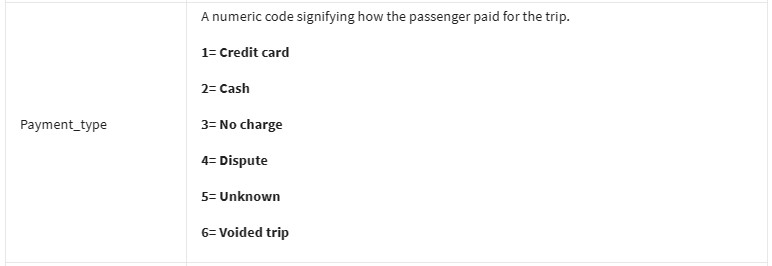

In [31]:
df['payment_type'].value_counts()

1    15265
2     7267
3      121
4       46
Name: payment_type, dtype: int64

In [32]:
#check mean tip for credit card payments
print(df[(df['payment_type']==1)]['tip_amount'].mean())
#check mean tip for cash payments
print(df[(df['payment_type']==2)]['tip_amount'].mean())

2.7298001965280054
0.0


***Check VendorID***

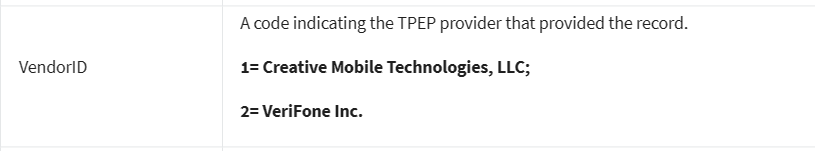

In [33]:
print('1= Creative Mobile Technologies, LLC Mean Total amount =',df[(df['VendorID']==1)]['total_amount'].mean())
print('2= VeriFone Inc.                     Mean Total amount =',df[(df['VendorID']==2)]['total_amount'].mean())
print("\n")
print("Value counts for Vendors::\n",df['VendorID'].value_counts())

# How many times is each vendor ID represented in the data?

1= Creative Mobile Technologies, LLC Mean Total amount = 16.298118733247296
2= VeriFone Inc.                     Mean Total amount = 16.32038175194044


Value counts for Vendors::
 2    12626
1    10073
Name: VendorID, dtype: int64


***Check Data for Credit Card payment only***

In [34]:
# Filter the data for credit card payments only
credit_card_df= df[(df['payment_type']==1)]
print(df[(df['payment_type']==1)].head(10))

    Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0     24870114         2  2017-03-25 08:55:43   2017-03-25 09:09:47   
1     35634249         1  2017-04-11 14:53:28   2017-04-11 15:19:58   
2    106203690         1  2017-12-15 07:26:56   2017-12-15 07:34:08   
3     38942136         2  2017-05-07 13:17:59   2017-05-07 13:48:14   
5     23345809         2  2017-03-25 20:34:11   2017-03-25 20:42:11   
6     37660487         2  2017-05-03 19:04:09   2017-05-03 20:03:47   
7     69059411         2  2017-08-15 17:41:06   2017-08-15 18:03:05   
9     95294817         1  2017-11-10 15:20:29   2017-11-10 15:40:55   
10    18017909         2  2017-03-04 11:58:00   2017-03-04 12:13:12   
11    18600059         2  2017-03-05 19:15:30   2017-03-05 19:52:18   

    passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                 6           3.34           1                  N   
1                 1           1.80           1                  N   
2          

***Check data for Credit Card only and Passanger Count***

In [35]:
# Filter the data for passenger count only
#print(df['passenger_count'].value_counts())

print(df[(df['payment_type']==1)]['passenger_count'].value_counts())

1    10977
2     2168
5      775
3      600
6      451
4      267
0       27
Name: passenger_count, dtype: int64


 ***Check average tip amount for each passenger count (credit card payments only)***

In [36]:
# Calculate the average tip amount for each passenger count (credit card payments only)

credit_card_df.groupby(['passenger_count']).mean(numeric_only=True)[['tip_amount']]

tip_amount
passenger_count            
0                  2.610370
1                  2.714681
2                  2.829949
3                  2.726800
4                  2.607753
5                  2.762645
6                  2.643326

##### **Feature Selection**

***1) Variable Selection : <Which variables are important for this project?>***

##### **Feature Extraction**

###### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [37]:
# Create `pickup_dropoff` column
df['pickup_dropoff']= df['PULocationID'].astype('str')+" "+df['DOLocationID'].astype('str')

grouped=df.groupby(['pickup_dropoff']).mean()[['trip_distance']]
grouped

### YOUR CODE HERE ###

C:\Users\gurur\AppData\Local\Temp\ipykernel_23344\1230368912.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped=df.groupby(['pickup_dropoff']).mean()[['trip_distance']]


trip_distance
pickup_dropoff               
1 1                  2.433333
10 148              15.700000
100 1               16.890000
100 100              0.253333
100 107              1.180000
...                       ...
97 65                0.500000
97 66                1.400000
97 80                3.840000
97 90                4.420000
97 97                1.006667

[4172 rows x 1 columns]

`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [38]:
# 1. Convert `grouped` to a dictionary
grouped_dict=grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict =grouped_dict.get('trip_distance')
#grouped_dict


1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [39]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance']=df['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df['mean_distance']=df['mean_distance'].map(grouped_dict)
### YOUR CODE HERE ###

# Confirm that it worked
df.head()
### YOUR CODE HERE ###

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0    24870114         2  2017-03-25 08:55:43   2017-03-25 09:09:47   
1    35634249         1  2017-04-11 14:53:28   2017-04-11 15:19:58   
2   106203690         1  2017-12-15 07:26:56   2017-12-15 07:34:08   
3    38942136         2  2017-05-07 13:17:59   2017-05-07 13:48:14   
4    30841670         2  2017-04-15 23:32:20   2017-04-15 23:49:03   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                6           3.34           1                  N   
1                1           1.80           1                  N   
2                1           1.00           1                  N   
3                1           3.70           1                  N   
4                1           4.37           1                  N   

   PULocationID  DOLocationID  ...  tip_amount  tolls_amount  \
0           100           231  ...        2.76           0.0   
1           186            43  ...        4.00           0.0   
2           262           236  ...        1.45           0.0   
3           188            97  ...        6.39           0.0   
4             4           112  ...        0.00           0.0   

   improvement_surcharge  total_amount     month       day  hour  \
0                    0.3         16.56     March  Saturday     8   
1                    0.3         20.80     April   Tuesday    14   
2                    0.3          8.75  December    Friday     7   
3                    0.3         27.69       May    Sunday    13   
4                    0.3         17.80     April  Saturday    23   

    ride_duration pickup_dropoff mean_distance  
0 0 days 00:14:04        100 231      3.521667  
1 0 days 00:26:30         186 43      3.108889  
2 0 days 00:07:12        262 236      0.881429  
3 0 days 00:30:15         188 97      3.700000  
4 0 days 00:16:43          4 112      4.435000  

[5 rows x 24 columns]

###### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [40]:
### YOUR CODE HERE ###

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
#df1['pickup_drop_duration']= df1['tpep_pickup_datetime'].astype('str')+" "+df1['tpep_dropoff_datetime'].astype('str')
df.head(10)

grouped=df.groupby(['pickup_dropoff']).mean(numeric_only=False)['ride_duration']
grouped_dict=grouped.to_dict()
df['mean_duration']=df['pickup_dropoff']
df['mean_duration']=df['mean_duration'].map(grouped_dict)
df.head()


# Confirm that it worked

C:\Users\gurur\AppData\Local\Temp\ipykernel_23344\1874651063.py:8: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  grouped=df.groupby(['pickup_dropoff']).mean(numeric_only=False)['ride_duration']


Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0    24870114         2  2017-03-25 08:55:43   2017-03-25 09:09:47   
1    35634249         1  2017-04-11 14:53:28   2017-04-11 15:19:58   
2   106203690         1  2017-12-15 07:26:56   2017-12-15 07:34:08   
3    38942136         2  2017-05-07 13:17:59   2017-05-07 13:48:14   
4    30841670         2  2017-04-15 23:32:20   2017-04-15 23:49:03   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                6           3.34           1                  N   
1                1           1.80           1                  N   
2                1           1.00           1                  N   
3                1           3.70           1                  N   
4                1           4.37           1                  N   

   PULocationID  DOLocationID  ...  tolls_amount  improvement_surcharge  \
0           100           231  ...           0.0                    0.3   
1           186            43  ...           0.0                    0.3   
2           262           236  ...           0.0                    0.3   
3           188            97  ...           0.0                    0.3   
4             4           112  ...           0.0                    0.3   

   total_amount     month       day  hour   ride_duration  pickup_dropoff  \
0         16.56     March  Saturday     8 0 days 00:14:04         100 231   
1         20.80     April   Tuesday    14 0 days 00:26:30          186 43   
2          8.75  December    Friday     7 0 days 00:07:12         262 236   
3         27.69       May    Sunday    13 0 days 00:30:15          188 97   
4         17.80     April  Saturday    23 0 days 00:16:43           4 112   

  mean_distance             mean_duration  
0      3.521667 0 days 00:22:50.833333333  
1      3.108889 0 days 00:24:28.222222222  
2      0.881429           0 days 00:07:15  
3      3.700000           0 days 00:30:15  
4      4.435000           0 days 00:14:37  

[5 rows x 25 columns]

###### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [41]:
# Create 'rush_hour' col
df['rush_hour'] = (((df['tpep_pickup_datetime'].dt.hour > 6) & (df['tpep_pickup_datetime'].dt.hour <10)) | \
                            ((df['tpep_pickup_datetime'].dt.hour > 16) & (df['tpep_pickup_datetime'].dt.hour <20))) & \
                            ((df[('day')] !='Sunday') &  (df['day']!='Saturday'))   

### YOUR CODE HERE ###
# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df['rush_hour'] = df['rush_hour'].astype('int')

df['mean_duration'] = df['mean_duration'].dt.total_seconds()
df['ride_duration'] = df['ride_duration'].dt.total_seconds()


print(df['rush_hour'].value_counts())

#df1[df1[(['rush_hour'] == False)] =0 
df.head()

### YOUR CODE HERE ###

0    17189
1     5510
Name: rush_hour, dtype: int64


Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0    24870114         2  2017-03-25 08:55:43   2017-03-25 09:09:47   
1    35634249         1  2017-04-11 14:53:28   2017-04-11 15:19:58   
2   106203690         1  2017-12-15 07:26:56   2017-12-15 07:34:08   
3    38942136         2  2017-05-07 13:17:59   2017-05-07 13:48:14   
4    30841670         2  2017-04-15 23:32:20   2017-04-15 23:49:03   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                6           3.34           1                  N   
1                1           1.80           1                  N   
2                1           1.00           1                  N   
3                1           3.70           1                  N   
4                1           4.37           1                  N   

   PULocationID  DOLocationID  ...  improvement_surcharge  total_amount  \
0           100           231  ...                    0.3         16.56   
1           186            43  ...                    0.3         20.80   
2           262           236  ...                    0.3          8.75   
3           188            97  ...                    0.3         27.69   
4             4           112  ...                    0.3         17.80   

      month       day  hour  ride_duration  pickup_dropoff  mean_distance  \
0     March  Saturday     8          844.0         100 231       3.521667   
1     April   Tuesday    14         1590.0          186 43       3.108889   
2  December    Friday     7          432.0         262 236       0.881429   
3       May    Sunday    13         1815.0          188 97       3.700000   
4     April  Saturday    23         1003.0           4 112       4.435000   

  mean_duration rush_hour  
0   1370.833333         0  
1   1468.222222         0  
2    435.000000         1  
3   1815.000000         0  
4    877.000000         0  

[5 rows x 26 columns]

#### **Feature Transforation**

#### **Isolate Modelling Variables**

In [42]:
df_model = df.drop(['Unnamed: 0','PULocationID','DOLocationID','improvement_surcharge', \
                     'day','tpep_pickup_datetime','tpep_dropoff_datetime','month','tip_amount',\
                     'RatecodeID','store_and_fwd_flag','payment_type',\
                     'extra','mta_tax','tolls_amount','total_amount','pickup_dropoff','ride_duration','trip_distance'],axis=1)
#  'VendorID','passenger_count','rush_hour'
#df_model['rush_hour'] = df_model['rush_hour'].astype('int')


df_model.head()


VendorID  passenger_count  fare_amount  hour  mean_distance  mean_duration  \
0         2                6         13.0     8       3.521667    1370.833333   
1         1                1         16.0    14       3.108889    1468.222222   
2         1                1          6.5     7       0.881429     435.000000   
3         2                1         20.5    13       3.700000    1815.000000   
4         2                1         16.5    23       4.435000     877.000000   

   rush_hour  
0          0  
1          0  
2          1  
3          0  
4          0

#### **Pair Plot**

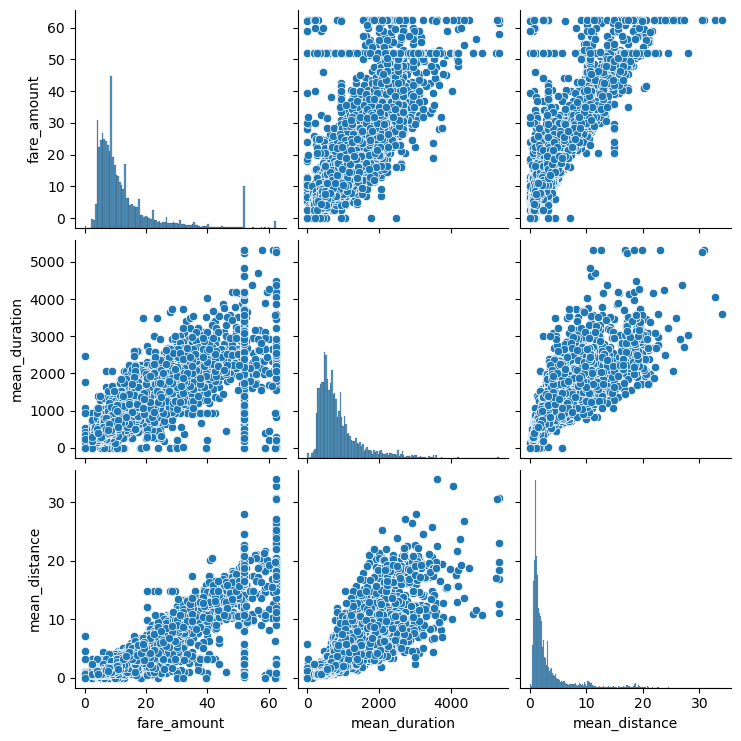

In [43]:
sns.pairplot(df_model[['fare_amount','mean_duration','mean_distance']])

#### **Identify Correlations**

In [44]:
df_model.corr(method='pearson')

VendorID  passenger_count  fare_amount      hour  \
VendorID         1.000000         0.266463     0.001045 -0.002186   
passenger_count  0.266463         1.000000     0.014942  0.009361   
fare_amount      0.001045         0.014942     1.000000  0.006062   
hour            -0.002186         0.009361     0.006062  1.000000   
mean_distance    0.004741         0.013428     0.910185 -0.010776   
mean_duration    0.001876         0.015852     0.859105  0.019954   
rush_hour       -0.002039        -0.016564    -0.026169 -0.017371   

                 mean_distance  mean_duration  rush_hour  
VendorID              0.004741       0.001876  -0.002039  
passenger_count       0.013428       0.015852  -0.016564  
fare_amount           0.910185       0.859105  -0.026169  
hour                 -0.010776       0.019954  -0.017371  
mean_distance         1.000000       0.874864  -0.046835  
mean_duration         0.874864       1.000000  -0.031010  
rush_hour            -0.046835      -0.031010   1.000000

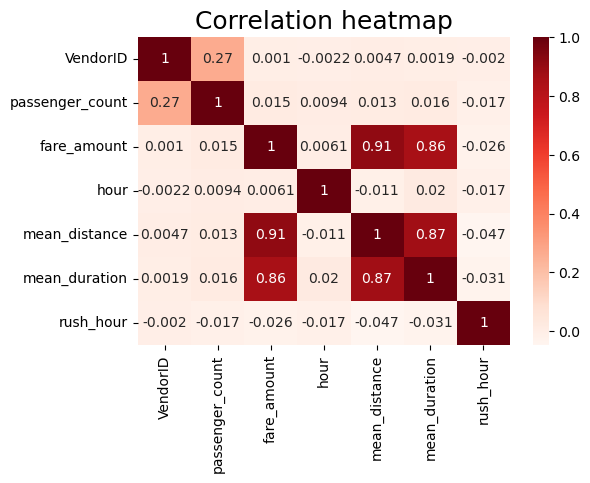

In [45]:
plt.figure(figsize=(6,4))
sns.heatmap(df_model.corr(method='pearson'),annot=True,cmap='Reds')
plt.title('Correlation heatmap',fontsize=18)
plt.show()

#### **Split Data into Outcome variable(y) and Variables (X)**

In [46]:
# Remove the target column from the features
X = df_model.drop(['fare_amount'],axis=1)
### YOUR CODE HERE ###

# Set y variable
y = df_model[['fare_amount']]
### YOUR CODE HERE ###

# Display first few rows
print(X.head())
print(y.head())

   VendorID  passenger_count  hour  mean_distance  mean_duration  rush_hour
0         2                6     8       3.521667    1370.833333          0
1         1                1    14       3.108889    1468.222222          0
2         1                1     7       0.881429     435.000000          1
3         2                1    13       3.700000    1815.000000          0
4         2                1    23       4.435000     877.000000          0
   fare_amount
0         13.0
1         16.0
2          6.5
3         20.5
4         16.5


#### **Pre-Process data**

#### **Encode categorical variables**

In [47]:
# Convert VendorID to string
X['VendorID']=X['VendorID'].astype('str')
### YOUR CODE HERE ###

# Get dummies
X=pd.get_dummies(X,drop_first=True)
X.head()

passenger_count  hour  mean_distance  mean_duration  rush_hour  VendorID_2
0                6     8       3.521667    1370.833333          0           1
1                1    14       3.108889    1468.222222          0           0
2                1     7       0.881429     435.000000          1           0
3                1    13       3.700000    1815.000000          0           1
4                1    23       4.435000     877.000000          0           1

#### **Split Data into Train and Test Data**

In [48]:
# Create training and testing sets

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

#### **Standardize the data**

In [49]:
# Standardize the X variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)

print('X_train_scaled',X_train_scaled)

X_train_scaled [[-0.50301524  1.48938279  0.8694684   0.17616665 -0.56575482  0.89286563]
 [-0.50301524 -1.23741887 -0.60011281 -0.69829589 -0.56575482  0.89286563]
 [ 0.27331093 -1.87901927 -0.47829156 -0.57301906 -0.56575482 -1.11998936]
 ...
 [-0.50301524  0.20618201 -0.45121122 -0.6788917  -0.56575482 -1.11998936]
 [-0.50301524  0.6873823  -0.58944763 -0.85743597  1.76755013 -1.11998936]
 [ 1.82596329  0.04578191  0.83673851  1.13212101 -0.56575482  0.89286563]]


#### **Fit the model**

In [50]:
# Fit your model to the training data
LinReg = LinearRegression() 
LinReg.fit(X_train_scaled,y_train)
X_train_scaled

array([[-0.50301524,  1.48938279,  0.8694684 ,  0.17616665, -0.56575482,
         0.89286563],
       [-0.50301524, -1.23741887, -0.60011281, -0.69829589, -0.56575482,
         0.89286563],
       [ 0.27331093, -1.87901927, -0.47829156, -0.57301906, -0.56575482,
        -1.11998936],
       ...,
       [-0.50301524,  0.20618201, -0.45121122, -0.6788917 , -0.56575482,
        -1.11998936],
       [-0.50301524,  0.6873823 , -0.58944763, -0.85743597,  1.76755013,
        -1.11998936],
       [ 1.82596329,  0.04578191,  0.83673851,  1.13212101, -0.56575482,
         0.89286563]])

### **Evaluate the regression model**

#### **For Training Data**

In [51]:
r_square = LinReg.score(X_train_scaled, y_train)
y_pred_train = LinReg.predict(X_train_scaled)

print('Coefficient of determination',r_square)
print('R^2:', r2_score(y_train,y_pred_train))
print('Mean absolute error', mean_absolute_error(y_train,y_pred_train) )
print('Mean squared error', mean_squared_error(y_train,y_pred_train) )
print('RMSE', np.sqrt(mean_squared_error(y_train,y_pred_train)) )

Coefficient of determination 0.83998317148096
R^2: 0.83998317148096
Mean absolute error 2.182804575739659
Mean squared error 17.874126808305558
RMSE 4.227780364246179


#### **For Testing Data**

In [52]:
# Scale the X_test data
X_test_scaled=scaler.transform(X_test)


# Evaluate the model performance on the testing data

r_square = LinReg.score(X_test_scaled, y_test)
y_pred_test = LinReg.predict(X_test_scaled)

print('Coefficient of determination',r_square)
print('R^2:', r2_score(y_test,y_pred_test))
print('Mean absolute error', mean_absolute_error(y_test,y_pred_test) )
print('Mean squared error', mean_squared_error(y_test,y_pred_test) )
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred_test)) )

Coefficient of determination 0.8682190714357031
R^2: 0.8682190714357031
Mean absolute error 2.1349908832116262
Mean squared error 14.330727109052816
RMSE 3.7855946836729384


### **Regression Results**

In [53]:
# Create a `results` dataframe

results =pd.DataFrame(data={'actual' : y_test['fare_amount'],
                            'predicted': y_pred_test.ravel()
                            })

results['residual'] = results['actual'] - results['predicted']
results.head()

actual  predicted   residual
5818     14.0  12.162512   1.837488
18134    28.0  16.246734  11.753266
4655      5.5   6.678789  -1.178789
7378     15.5  16.081166  -0.581166
13914     9.5  10.530364  -1.030364

### **Visualize regression model results**

Text(0.5, 1.0, 'Actual vs Predicted')

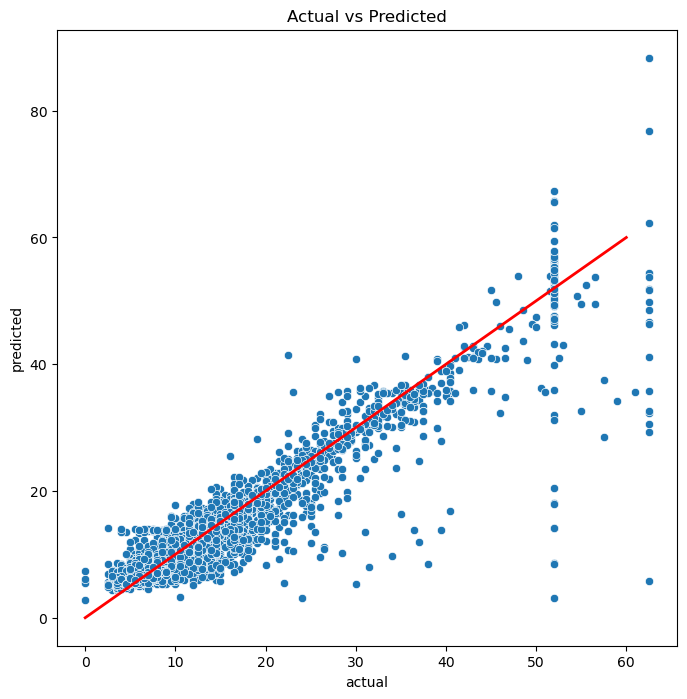

In [54]:
fig,axis = plt.subplots(figsize=(8,8))
sns.scatterplot( x= results['actual'],
                 y= results['predicted']
                )

plt.plot([0,60],[0,60],c='red',linewidth=2)
plt.title("Actual vs Predicted")

### **Visualize the residual distribution**

<Axes: xlabel='residual', ylabel='Count'>

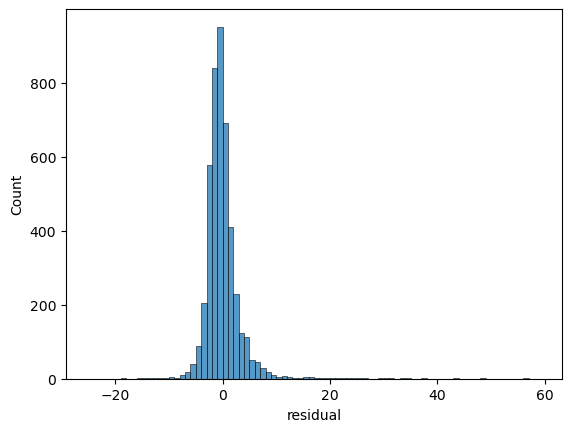

In [55]:
# Visualize the distribution of the `residuals`
results.describe()
sns.histplot(x=results['residual'], bins=range(-25,60,1))

In [56]:
# Calculate residual mean
results['residual'].mean()

-0.016204345327413133

sns.scatterplot(x= results['predicted'],
                y= results['residual'])

plt.axhline(0,c='red')

### **Coefficients**

In [57]:
coefficients = pd.DataFrame(LinReg.coef_,columns=X.columns)
coefficients

passenger_count      hour  mean_distance  mean_duration  rush_hour  \
0         0.029409  0.092136       7.145414       2.802589   0.140669   

   VendorID_2  
0   -0.053998

## **Supervised Machine Learning Models : Naive Bayes**

## **Supervised Machine Learning Models : Random Forest**

### **Build DataFrame**

In [58]:
df_RF = pd.read_csv('data\\2017_Yellow_Taxi_Trip_Data.csv')

### **EDA- Exploratory Data Analysis**

#### **Data Discovering**

#### **Structuring**

##### ***DataType Conversion***

In [59]:
# Convert data columns to datetime
df_RF['tpep_pickup_datetime']=pd.to_datetime(df_RF['tpep_pickup_datetime'])
df_RF['tpep_dropoff_datetime']=pd.to_datetime(df_RF['tpep_dropoff_datetime'])
df_RF.dtypes


Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

##### ***Create New Columns*** 

In [60]:
#Create new columns for Time series analysis
df_RF['month'] = df_RF['tpep_pickup_datetime'].dt.month_name()
df_RF['day'] = df_RF['tpep_pickup_datetime'].dt.day_name()
df_RF['hour'] = df_RF['tpep_pickup_datetime'].dt.hour

#Find the Ride Duration
df_RF['ride_duration'] =df_RF['tpep_dropoff_datetime']- df_RF['tpep_pickup_datetime']
df_RF['ride_duration'].dt.seconds
timediff = df_RF['ride_duration'].dt.days + df_RF['ride_duration'].dt.seconds 
timediff=timediff/60

df_RF['ride_duration'] =timediff
df_RF['ride_duration']

0        14.066667
1        26.500000
2         7.200000
3        30.250000
4        16.716667
           ...    
22694     3.266667
22695    40.800000
22696     4.133333
22697    11.933333
22698    13.333333
Name: ride_duration, Length: 22699, dtype: float64

As tree type models dont are tolerrent to outliers and missing values, we dont could you use the data as it is. 

#### **Joining**

In [61]:
df_RF['pickup_dropoff']= df_RF['PULocationID'].astype('str')+" "+df_RF['DOLocationID'].astype('str')

##Mean Distance / Duration  for Pickup Dropoff locations

# 1. Convert `grouped` to a dictionary
grouped=df_RF.groupby(['pickup_dropoff']).mean(numeric_only=True)[['trip_distance']]
grouped_dict=grouped.to_dict()
# 2. Reassign to only contain the inner dictionary
grouped_dict =grouped_dict.get('trip_distance')
# 3. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df_RF['mean_distance']=df_RF['pickup_dropoff']
# 4. Map `grouped_dict` to the `mean_distance` column
df_RF['mean_distance']=df_RF['mean_distance'].map(grouped_dict)


grouped=df_RF.groupby(['pickup_dropoff']).mean(numeric_only=False)['ride_duration']
grouped_dict=grouped.to_dict()
df_RF['mean_duration']=df_RF['pickup_dropoff']
df_RF['mean_duration']=df_RF['mean_duration'].map(grouped_dict)



# Create 'rush_hour' col
df_RF['rush_hour'] = (((df_RF['tpep_pickup_datetime'].dt.hour > 6) & (df_RF['tpep_pickup_datetime'].dt.hour <10)) | \
                            ((df_RF['tpep_pickup_datetime'].dt.hour > 16) & (df_RF['tpep_pickup_datetime'].dt.hour <20))) & \
                            ((df_RF[('day')] !='Sunday') &  (df_RF['day']!='Saturday'))   

### YOUR CODE HERE ###
# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df_RF['rush_hour'] = df_RF['rush_hour'].astype('int')

df_RF.head()

C:\Users\gurur\AppData\Local\Temp\ipykernel_23344\3871061681.py:16: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  grouped=df_RF.groupby(['pickup_dropoff']).mean(numeric_only=False)['ride_duration']


Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0    24870114         2  2017-03-25 08:55:43   2017-03-25 09:09:47   
1    35634249         1  2017-04-11 14:53:28   2017-04-11 15:19:58   
2   106203690         1  2017-12-15 07:26:56   2017-12-15 07:34:08   
3    38942136         2  2017-05-07 13:17:59   2017-05-07 13:48:14   
4    30841670         2  2017-04-15 23:32:20   2017-04-15 23:49:03   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                6           3.34           1                  N   
1                1           1.80           1                  N   
2                1           1.00           1                  N   
3                1           3.70           1                  N   
4                1           4.37           1                  N   

   PULocationID  DOLocationID  ...  improvement_surcharge  total_amount  \
0           100           231  ...                    0.3         16.56   
1           186            43  ...                    0.3         20.80   
2           262           236  ...                    0.3          8.75   
3           188            97  ...                    0.3         27.69   
4             4           112  ...                    0.3         17.80   

      month       day  hour  ride_duration  pickup_dropoff  mean_distance  \
0     March  Saturday     8      14.066667         100 231       3.521667   
1     April   Tuesday    14      26.500000          186 43       3.108889   
2  December    Friday     7       7.200000         262 236       0.881429   
3       May    Sunday    13      30.250000          188 97       3.700000   
4     April  Saturday    23      16.716667           4 112       4.435000   

  mean_duration rush_hour  
0     22.847222         0  
1     24.470370         0  
2      7.250000         1  
3     30.250000         0  
4     14.616667         0  

[5 rows x 26 columns]

### **Feature Engineering**

#### **Feature Extraction**

Feature Extraction: Producing new features form existing ones
e.g. number of day from star and End date

In [62]:
#For tip percent
df_RF['tip_percent'] = round(df_RF['tip_amount'] / (df_RF['total_amount'] - df_RF['tip_amount']), 3)

# Create 'generous' col (target)
df_RF['generous'] = df_RF['tip_percent']
df_RF['generous'] = (df_RF['generous'] >= 0.2)

# Create 'am_rush' col
df_RF['am_rush'] = ((df_RF['hour'] >= 6 ) & (df_RF['hour'] < 10))

# Create 'daytime' col
df_RF['daytime'] = ((df_RF['hour'] >= 10) & (df_RF['hour'] < 16))

# Create 'pm_rush' col
df_RF['pm_rush'] = ((df_RF['hour'] >= 16) & (df_RF['hour'] < 20))

# Create 'nighttime' col
df_RF['nighttime'] = ((df_RF['hour'] >= 20) | (df_RF['hour'] < 6))

##### **Get the predicted fare from Regression model**

df_RF.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
month                            object
day                              object
hour                              int64
ride_duration                   float64
pickup_dropoff                   object
mean_distance                   float64
mean_duration                   float64


**Add fare predicted values from regression model**

In [63]:
scaler=StandardScaler().fit(X)
X_scaled=scaler.transform(X)
print('X_scaled',X_scaled)

df_RF['predicted_fare'] = LinReg.predict(X_scaled)
df_RF.head()

X_scaled [[ 3.39065627 -0.91999637  0.17093801  0.83195364 -0.56617475  0.8931955 ]
 [-0.4997803   0.04393068  0.05495383  0.99296921 -0.56617475 -1.11957573]
 [-0.4997803  -1.08065088 -0.57092814 -0.7152838   1.76623915 -1.11957573]
 ...
 [-0.4997803   0.04393068 -0.62633441 -0.77886169 -0.56617475  0.8931955 ]
 [-0.4997803  -0.27737834 -0.23485053  0.21719198 -0.56617475  0.8931955 ]
 [-0.4997803  -0.11672383 -0.40359028 -0.50145366 -0.56617475 -1.11957573]]


Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0    24870114         2  2017-03-25 08:55:43   2017-03-25 09:09:47   
1    35634249         1  2017-04-11 14:53:28   2017-04-11 15:19:58   
2   106203690         1  2017-12-15 07:26:56   2017-12-15 07:34:08   
3    38942136         2  2017-05-07 13:17:59   2017-05-07 13:48:14   
4    30841670         2  2017-04-15 23:32:20   2017-04-15 23:49:03   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                6           3.34           1                  N   
1                1           1.80           1                  N   
2                1           1.00           1                  N   
3                1           3.70           1                  N   
4                1           4.37           1                  N   

   PULocationID  DOLocationID  ...  mean_distance  mean_duration  rush_hour  \
0           100           231  ...       3.521667      22.847222          0   
1           186            43  ...       3.108889      24.470370          0   
2           262           236  ...       0.881429       7.250000          1   
3           188            97  ...       3.700000      30.250000          0   
4             4           112  ...       4.435000      14.616667          0   

   tip_percent  generous  am_rush  daytime  pm_rush nighttime predicted_fare  
0        0.200      True     True    False    False     False      16.331870  
1        0.238      True    False     True    False     False      16.037460  
2        0.199     False     True    False    False     False       7.002228  
3        0.300      True    False     True    False     False      18.707604  
4        0.000     False    False    False    False      True      15.985010  

[5 rows x 33 columns]

#### **Feature Transformation**

Feature Transformation: Feature transformation is a process where you take features that already exist in the dataset, and alter them so that they’re better suited to be used for training the model.

 - Log Normalization: Some models do not handle continuous variables with skewed distributions very well. As a solution, you can take the log of a skewed feature, reducing the skew and making the data better for modelling. This is known as log normalization. 

 - Scaling
     - Normalization (between 0 and 1) 
         - x_(i normalized)=(x_i− x_min) /(x_max−x_min)

     - Standardization (with mean)
         - x_(i standardized)=(x_i− x_mean) /x_(stand.dev)
         

 - Encoding
    - Assigning number to categorical data

##### **Log Normalization**

##### **Scaling**

##### **Encoding**

In [64]:
##Convert (True/False) to binary (0 / 1) by converting the data type to int
df_RF['am_rush']   = df_RF['am_rush'].astype(int)
df_RF['pm_rush']   = df_RF['pm_rush'].astype(int)
df_RF['daytime']   = df_RF['daytime'].astype(int) 
df_RF['nighttime'] = df_RF['nighttime'].astype(int)
df_RF['generous'] = df_RF['generous'].astype(int)

## Convert categorical variables to string types (even if they seem to be numeric)
df_RF['VendorID']    =df_RF['VendorID'].astype(str)
df_RF['RatecodeID']  =df_RF['RatecodeID'].astype(str)
df_RF['PULocationID']=df_RF['PULocationID'].astype(str)
df_RF['DOLocationID']=df_RF['DOLocationID'].astype(str)
#df['month']=df['month'].astype(str)
df_RF['month'] = df_RF['tpep_pickup_datetime'].dt.month
day_number ={'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
df_RF['day'] = df['day'].map(day_number)

#df_RF['pickup_dropoff'] = df_RF['pickup_dropoff'].unique()


def custom_mapping(column):
    unique_values = column.unique()
    return {value: i + 1 for i, value in enumerate(unique_values)}

df_RF['pickup_dropoff'] = df_RF['pickup_dropoff'].apply(lambda x: custom_mapping(df_RF['pickup_dropoff'])[x])
df_RF['pickup_dropoff'] = df_RF['pickup_dropoff'].astype(str)

#### **Feature Selection**

- As part of feature selection, we need do the following
    - Drop Unnecessary Variables
         - **There are 3 Types of features**
            - Predictive : useful for predicting the outcome
            - Interactive: The don’t predict by themselves, but when used with other features, they become predictive
            - Irrelevant: Not useful to predict!
    - Select the evaluation metric for the model

##### **Drop Irrelevant columns**

In [65]:
#Reason for Dropping
# Unnamed: 0 : 

#drop_columns_list = ['Unnamed: 0', 'tpep_pickup_datetime','tpep_dropoff_datetime', 'pickup_dropoff',
#                     'trip_distance','payment_type', 'store_and_fwd_flag','fare_amount', 'extra', 'mta_tax', 'tip_amount','tip_percent',
#                     'tolls_amount', 'improvement_surcharge', 'total_amount','hour','rush_hour','ride_duration']

drop_columns_list = ['Unnamed: 0', 'tpep_pickup_datetime','tpep_dropoff_datetime', 'PULocationID','DOLocationID',
                     'trip_distance','payment_type', 'store_and_fwd_flag','fare_amount', 'extra', 'mta_tax', 'tip_amount','tip_percent',
                     'tolls_amount', 'improvement_surcharge', 'total_amount','hour','rush_hour','ride_duration']


df_new = df_RF.drop(drop_columns_list, axis=1)
#df_new = pd.get_dummies(df_temp, drop_first=True)

df_new.dtypes


VendorID            object
passenger_count      int64
RatecodeID          object
month                int64
day                  int64
pickup_dropoff      object
mean_distance      float64
mean_duration      float64
generous             int32
am_rush              int32
daytime              int32
pm_rush              int32
nighttime            int32
predicted_fare     float64
dtype: object

##### **Select Evaluation Metric**

Model evaluation metric selection steps:
1. Find the class imbalance, 
    - No Class imbalance 
        - Use Accuracy
    - Class imbalance exists
        - **Ask yourself**
            - What is your objective?, 
            - what is the cost of FP or FN?
        - **Choose the metric**
            - You want to know how many positives are correct?
                - use Precision
            - You want to know how many actual positives were identified correctly?
                - Use Recall (e.g spam detection)
            - Both Precison and Recall are important 
                - Use F1 score
            
        

In [66]:
# Get class balance of 'generous' col
df_new['generous'].value_counts(normalize=True)*100

0    64.601965
1    35.398035
Name: generous, dtype: float64

Its an imbalanced class, and since the FN and FN both have almost equal impact , we choose F1 score for model evaluation

### **Checking Model Assumption**

One of the advantages of using Tree based model is that we dont need any assumptions!

### **Model Building**

#### **Split The data**

In [67]:
#Isolate target variable
y_rf = df_new['generous']
#Isolate the features 
X_rf = df_new.drop('generous', axis=1)
# Split into train and test sets
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, stratify=y_rf, test_size=0.2, random_state=42)

#### **Random Forest Model**

##### **Grid Search with various hyperparameters**

In [68]:
import sklearn
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune 
# Note that this example only contains 1 value for each parameter for simplicity,
# but you should assign a dictionary with ranges of values
'''
cv_params = {'max_depth': [None],
             'max_features': [8],
             'max_samples': [0.8],
             'min_samples_leaf': [1],
             'min_samples_split': [6,8],
             'n_estimators': [600]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')             
'''
'''
cv_params = {'max_depth': [6,10,12,None],
             'max_features': [3,5,6],
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [6,3],
             'n_estimators': [200,300,500,100]
             }
             
# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')
'''


X_rf_train.head()
#sklearn.metrics.SCORERS.keys()
X_rf_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18159 entries, 8331 to 779
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         18159 non-null  object 
 1   passenger_count  18159 non-null  int64  
 2   RatecodeID       18159 non-null  object 
 3   month            18159 non-null  int64  
 4   day              18159 non-null  int64  
 5   pickup_dropoff   18159 non-null  object 
 6   mean_distance    18159 non-null  float64
 7   mean_duration    18159 non-null  float64
 8   am_rush          18159 non-null  int32  
 9   daytime          18159 non-null  int32  
 10  pm_rush          18159 non-null  int32  
 11  nighttime        18159 non-null  int32  
 12  predicted_fare   18159 non-null  float64
dtypes: float64(3), int32(4), int64(3), object(3)
memory usage: 1.7+ MB


##### Pickle the model

In [69]:
import pickle 

# Define a path to the folder where you want to save the model
path = 'pikcle_files/'

def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)
        

def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [70]:
#write_pickle(path,rf_cv,'automati_model')
rf_cv=read_pickle(path,"automati_model")

##### **Fit the Model**

In [71]:
%%time
#rf_cv.fit(X_rf_train, y_rf_train)
#write_pickle(path,rf_cv,'automati_model')

CPU times: total: 0 ns
Wall time: 0 ns


### **Evaluvating the model**

##### **Examine the best combination of hyperparameters**

In [72]:
print("Best Parameters",rf_cv.best_params_)
print("Best Scores",rf_cv.best_score_)

Best Parameters {'max_depth': None, 'max_features': 8, 'max_samples': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 600}
Best Scores 0.4163540644924845


##### **Make Results**

In [73]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [74]:
make_results('Random Forest Classifier',rf_cv,'f1') 

model  precision    recall        F1  accuracy
0  Random Forest Classifier   0.502618  0.355478  0.416354  0.647227

### **Predict using model**

In [75]:
# Get scores on test data
rf_preds = rf_cv.best_estimator_.predict(X_rf_test)

In [76]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [77]:
# Get scores on test data
rf_test_scores = get_test_scores('RF test', rf_preds, y_rf_test)
results = pd.concat([results, rf_test_scores], axis=0)
results

actual  predicted   residual    model  precision    recall        F1  \
5818     14.0  12.162512   1.837488      NaN        NaN       NaN       NaN   
18134    28.0  16.246734  11.753266      NaN        NaN       NaN       NaN   
4655      5.5   6.678789  -1.178789      NaN        NaN       NaN       NaN   
7378     15.5  16.081166  -0.581166      NaN        NaN       NaN       NaN   
13914     9.5  10.530364  -1.030364      NaN        NaN       NaN       NaN   
...       ...        ...        ...      ...        ...       ...       ...   
7840      5.5   6.005142  -0.505142      NaN        NaN       NaN       NaN   
8         9.0   7.178360   1.821640      NaN        NaN       NaN       NaN   
16996     7.0   6.679520   0.320480      NaN        NaN       NaN       NaN   
19601     8.5  10.394735  -1.894735      NaN        NaN       NaN       NaN   
0         NaN        NaN        NaN  RF test   0.513465  0.355943  0.420434   

       accuracy  
5818        NaN  
18134       NaN  
4655        NaN  
7378        NaN  
13914       NaN  
...         ...  
7840        NaN  
8           NaN  
16996       NaN  
19601       NaN  
0      0.652643  

[4541 rows x 8 columns]

### **Interpreting the model results**

#### **Tree Plot**

In [83]:
#It takes time, so do you want to plot?
'''
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)

tree.plot_tree(rf_cv.best_estimator_.estimators_[0])

fig.savefig('rf_individualtree.png')
'''

"\nfrom sklearn import tree\n\nfig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)\n\ntree.plot_tree(rf_cv.best_estimator_.estimators_[0])\n\nfig.savefig('rf_individualtree.png')\n"

#### **Confusion Matrix**

TP = {572},TN = {2391},FP = {542},FN = {1035}


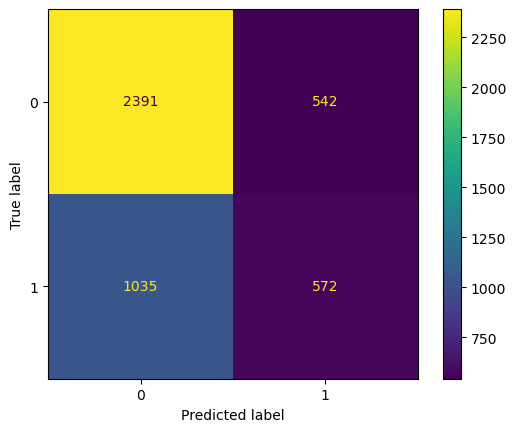

In [85]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_rf_test, rf_preds, labels=rf_cv.classes_)

TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
print("TP = {%d},TN = {%d},FP = {%d},FN = {%d}" % (TP,TN,FP,FN))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_cv.classes_, 
                             )
disp.plot(values_format='');

# tn, fp, fn, tp=confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()# Plot confusion matrix


#### Feature Importance

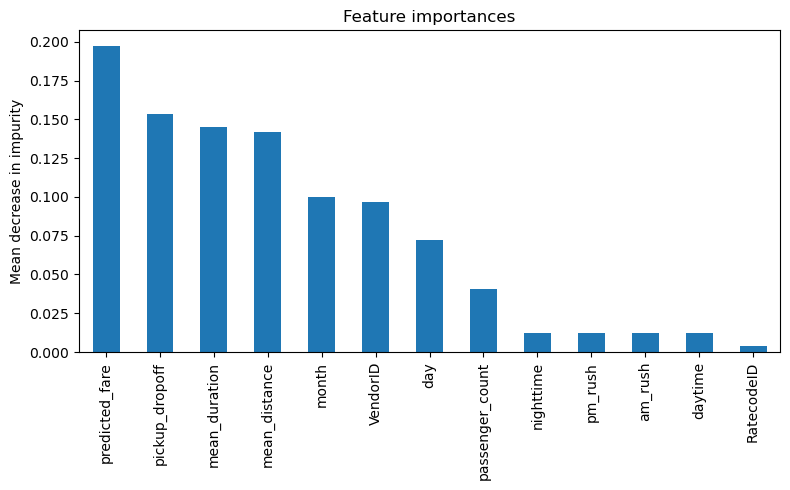

In [84]:
importances = rf_cv.best_estimator_.feature_importances_
rf_cv_importances = pd.Series(importances, index=X_rf_test.columns)
rf_cv_importances = rf_cv_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_cv_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();




## **Supervised Machine Learning Models : XGBoost**

### **Feature Engineering**

### **Checking Model Assumption**

### **Model Building**

### **Evaluvating the model**

## **APPENDIX**